# IBM HR Attrition

Attrition: When an employee leaves the company due to resignation or retirement, then it is called Attrition. Employees leave the company for personal and professional reasons like retirement, lower growth potential, lower work satisfaction, lower pay rate, bad work environment, etc. Attrition is part and parcel of any business. Attrition is a cause of concern when it crosses a limit.

The attrition rate, also known as churn rate, can be defined as the rate at which employees leave an organization from a specific group over a particular period of time.

The dataset for the analysis is taken from Kaggle. To get insights about what factors contribute to employee attrition, we use Python and libraries like pandas, matplotlib, and seaborn. In this blog, we mostly talk about absolute and percentage values.

In [1]:
#importing packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#calling data
HR_data=pd.read_excel("HR dataset-team 7.xlsx")
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,7,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,8,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,9,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [3]:
#basic informations
HR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23436 entries, 0 to 23435
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23433 non-null  float64
 1   Attrition                 23423 non-null  object 
 2   BusinessTravel            23428 non-null  object 
 3   DailyRate                 23425 non-null  float64
 4   Department                23425 non-null  object 
 5   DistanceFromHome          23427 non-null  float64
 6   Education                 23424 non-null  float64
 7   EducationField            23427 non-null  object 
 8   EmployeeCount             23431 non-null  float64
 9   EmployeeNumber            23436 non-null  object 
 10  Application ID            23433 non-null  object 
 11  EnvironmentSatisfaction   23427 non-null  float64
 12  Gender                    23426 non-null  object 
 13  HourlyRate                23427 non-null  float64
 14  JobInv

In [4]:
HR_data.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount               float64
EmployeeNumber               object
Application ID               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                  float64
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction             float64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               

The data types are float and object.

In [5]:
#shape
HR_data.shape

(23436, 37)

There are 23436 rows and 37 columns

In [6]:
#features & target
HR_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'Application ID', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In all we have 36 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Voluntary resignation or Currently working.

In [7]:
#numerical columns
num_cols=[features for features in HR_data.columns if HR_data[features].dtypes !='O']
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [8]:
#categorical columns
cat_cols=HR_data.select_dtypes(include='object')
cat_cols.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EmployeeNumber', 'Application ID', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Employee Source'],
      dtype='object')

There are 25 numerical columns and 12 categorical columns.

In [9]:
HR_data.nunique()

Age                            43
Attrition                       2
BusinessTravel                  3
DailyRate                     883
Department                      3
DistanceFromHome               29
Education                       5
EducationField                  7
EmployeeCount                   1
EmployeeNumber              23368
Application ID              23419
EnvironmentSatisfaction         4
Gender                          2
HourlyRate                     71
JobInvolvement                  4
JobLevel                        5
JobRole                         9
JobSatisfaction                 4
MaritalStatus                   3
MonthlyIncome                1349
MonthlyRate                  1427
NumCompaniesWorked             10
Over18                          1
OverTime                        2
PercentSalaryHike              15
PerformanceRating               2
RelationshipSatisfaction        4
StandardHours                   1
StockOptionLevel                4
TotalWorkingYe

In [10]:
HR_data=HR_data.drop(['EmployeeNumber'],axis=1)

In [11]:
HR_data=HR_data.drop(['Application ID'],axis=1)

In [12]:
HR_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [13]:
HR_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23425.0,801.849861,403.210487,102.0,465.0,802.0,1157.0,1499.0
DistanceFromHome,23427.0,9.165322,8.095706,1.0,2.0,7.0,14.0,29.0
Education,23424.0,2.909921,1.024732,1.0,2.0,3.0,4.0,5.0
EmployeeCount,23431.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
EnvironmentSatisfaction,23427.0,2.718615,1.095599,1.0,2.0,3.0,4.0,4.0
HourlyRate,23427.0,65.864131,20.353313,30.0,48.0,66.0,83.0,100.0
JobInvolvement,23427.0,2.729756,0.710272,1.0,2.0,3.0,3.0,4.0
JobLevel,23429.0,2.064151,1.105626,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,23427.0,2.727323,1.101293,1.0,2.0,3.0,4.0,4.0


In [14]:
#null values
HR_data.isna().sum()

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   11
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtCompany              13
YearsInCurrentRole          15
YearsSin

In [15]:
#null value percentage
Nullvalue_percentage=(HR_data.isna().sum()/len(HR_data))*100
Nullvalue_percentage

Age                         0.012801
Attrition                   0.055470
BusinessTravel              0.034136
DailyRate                   0.046936
Department                  0.046936
DistanceFromHome            0.038402
Education                   0.051203
EducationField              0.038402
EmployeeCount               0.021335
EnvironmentSatisfaction     0.038402
Gender                      0.042669
HourlyRate                  0.038402
JobInvolvement              0.038402
JobLevel                    0.029869
JobRole                     0.038402
JobSatisfaction             0.038402
MaritalStatus               0.046936
MonthlyIncome               0.055470
MonthlyRate                 0.046936
NumCompaniesWorked          0.038402
Over18                      0.042669
OverTime                    0.051203
PercentSalaryHike           0.059737
PerformanceRating           0.042669
RelationshipSatisfaction    0.034136
StandardHours               0.042669
StockOptionLevel            0.038402
T

In [16]:
Total_nullvalue_percentage=Nullvalue_percentage.sum()
Total_nullvalue_percentage

1.4806280935313196

The total percentage of null values present in the dataset is 1.5%.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>],
       [<AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>],
       [<AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'cent

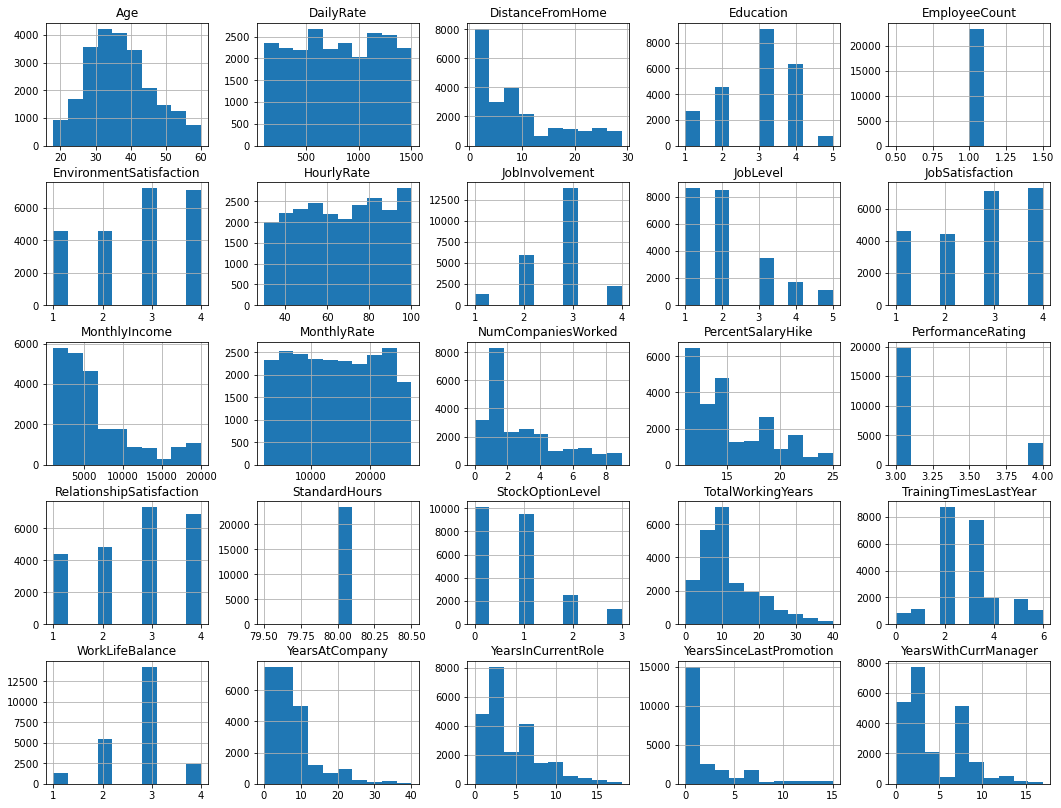

In [17]:
#histogram for numerical features
HR_data.hist(figsize=(18, 14))

# Inference from histogram
1)The age graph is almost normally distibuted.The minimum & maximum age of workforce is 18 & 60.Most of the employees are in between the age group 30-40.
2)The daily rate is between 100 and 1500.
3)Majority of the employees living space distance from company is less than 10km.
4)Most of the employees education level is 3.
5)The higest rating for the environment satisfaction is 3 & 4.
6)The hourly rate is between 20-100.
7)The higest rating for job involvement is 3.
8)Majority of the employees joblevel is 1 & 2.
9)3 & 4 has the higest rating for job satisfaction.
10)Monthly salary is between 1000-20000.
11)Major number of employees worked for more than one company before joining IBM.
12)Many of them have salary hike percentage less than 15%.
13)3 is the highest performance rating of employees.
14)Most of the employees relationship satisfaction rating is 3 & 4.
15)The satandared working hours of employees is 80hr.
16)Only few employees have taken stock option plan.
17)Most of the employees working years is 20 and below.
18)Many employees got 2 time training for last year.
19)3 is the higest rating for work life balance.
20)Many of the employees are working for IBM for less than 13 years.
21)Emloyees are working in the current role for less than 10 years.
22)Majority of them got promotions & working with the current manager.

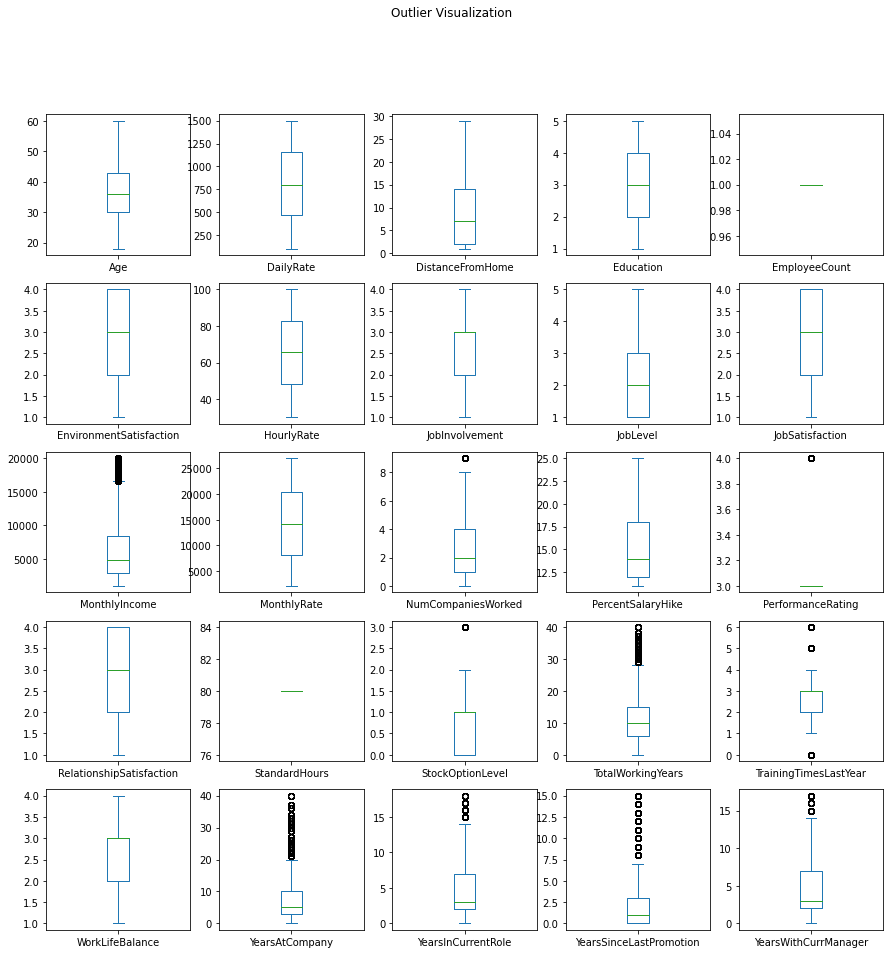

In [18]:
#outlier visualization 
HR_data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),title='Outlier Visualization')
plt.show()

Some columns in the dataset contain outliers.It will be handelled during data pre-processing.

# Exploratory Data Visualization

# Univariate Visualization

# Target Column

<AxesSubplot:xlabel='Attrition', ylabel='count'>

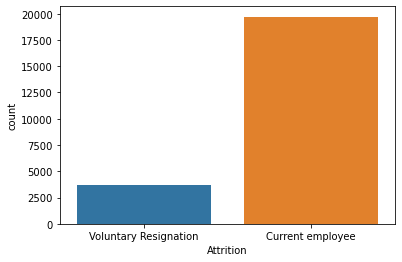

In [19]:
#count plot of target.
sns.countplot(x='Attrition', data=HR_data)

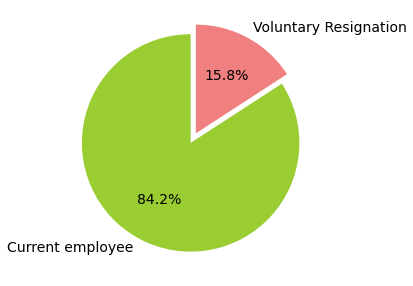

In [20]:
#pie chart
plt.rcParams['figure.figsize'] =5,5
labels = HR_data['Attrition'].value_counts().index.tolist()
sizes = HR_data['Attrition'].value_counts().tolist()
explode = (0, 0.1)
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

# Inference
The figure showing is the figure of employee attrition. In this dataset, 3709 employees left the company while 19714 stay(ie only 15.8% of the employees left, rest are still working in IBM).The data is very imbalanced.

# Visualization for Numerical Features

# Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

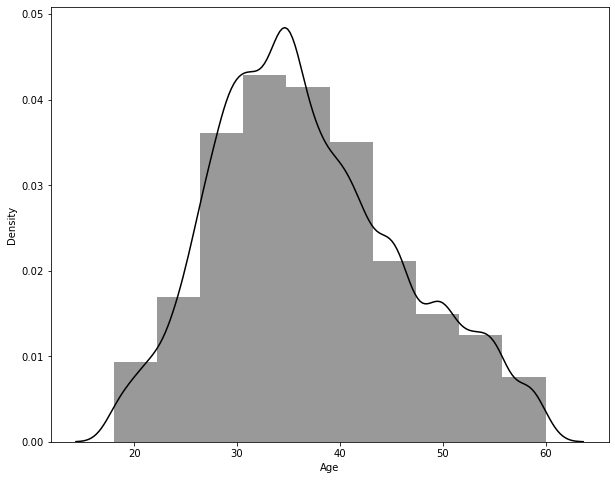

In [21]:
#distplot of Age column
plt.figure(figsize=[10,8])
sns.distplot(HR_data['Age'],hist=True,kde=True,color='k',bins=10)

# Inference
The graph is normally distributed.
The minimum age of workforce is 18.
The maximum age of workforce is 60.
Majority of the employees lie between the age range 30-40.

# distplot of all numerical features

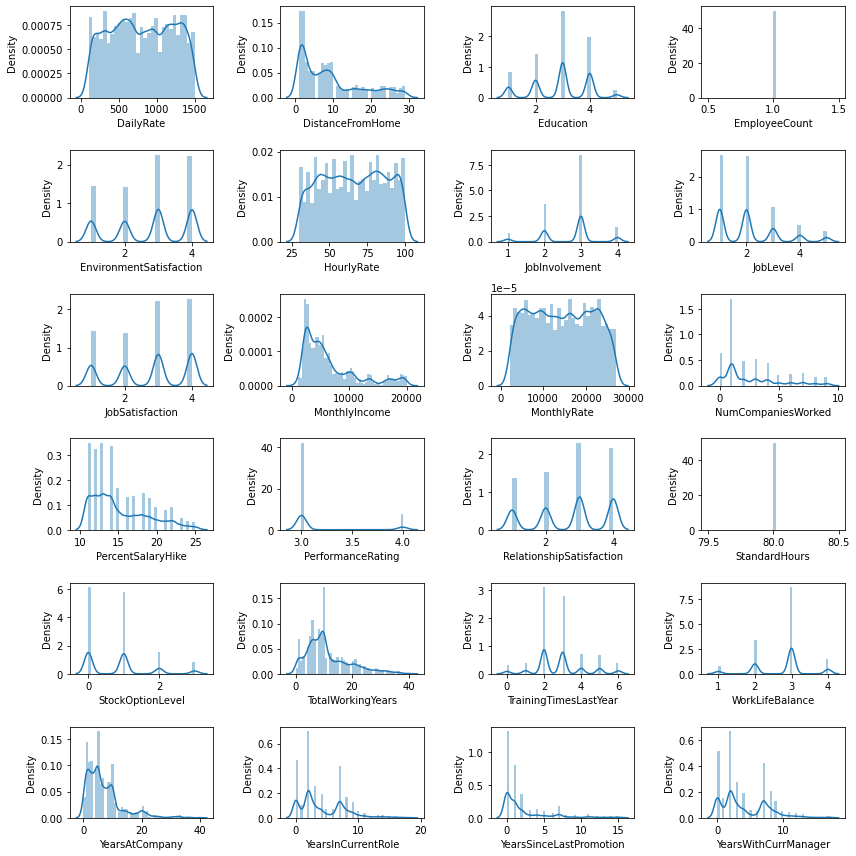

In [22]:
import re
fig,ax = plt.subplots(6,4, figsize=(12,12))                
sns.distplot(HR_data['DailyRate'], ax = ax[0,0]) 
sns.distplot(HR_data['DistanceFromHome'], ax = ax[0,1])
sns.distplot(HR_data['Education'], ax = ax[0,2]) 
sns.distplot(HR_data['EmployeeCount'], ax = ax[0,3]) 
sns.distplot(HR_data['EnvironmentSatisfaction'], ax = ax[1,0]) 
sns.distplot(HR_data['HourlyRate'], ax = ax[1,1]) 
sns.distplot(HR_data['JobInvolvement'], ax = ax[1,2]) 
sns.distplot(HR_data['JobLevel'], ax = ax[1,3]) 
sns.distplot(HR_data['JobSatisfaction'], ax = ax[2,0]) 
sns.distplot(HR_data['MonthlyIncome'], ax = ax[2,1])
sns.distplot(HR_data['MonthlyRate'], ax = ax[2,2])
sns.distplot(HR_data['NumCompaniesWorked'], ax = ax[2,3])
sns.distplot(HR_data['PercentSalaryHike'], ax = ax[3,0])
sns.distplot(HR_data['PerformanceRating'], ax = ax[3,1])
sns.distplot(HR_data['RelationshipSatisfaction'], ax = ax[3,2])
sns.distplot(HR_data['StandardHours'], ax = ax[3,3])
sns.distplot(HR_data['StockOptionLevel'], ax = ax[4,0])
sns.distplot(HR_data['TotalWorkingYears'], ax = ax[4,1])
sns.distplot(HR_data['TrainingTimesLastYear'], ax = ax[4,2])
sns.distplot(HR_data['WorkLifeBalance'], ax = ax[4,3])
sns.distplot(HR_data['YearsAtCompany'], ax = ax[5,0])
sns.distplot(HR_data['YearsInCurrentRole'], ax = ax[5,1])
sns.distplot(HR_data['YearsSinceLastPromotion'], ax = ax[5,2])
sns.distplot(HR_data['YearsWithCurrManager'], ax = ax[5,3])
plt.tight_layout()
plt.show()

# Inference
Using distplot we find out the distribution of all numerical features.Here we can see that EmployeeCount and StandardHours does not have much influence.

# Distance from home

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

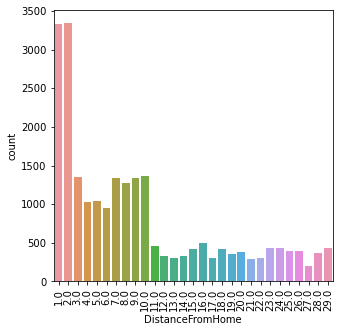

In [23]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['DistanceFromHome'])

# Inference
From this graph we can see that around 3400 employees live near to the company,ie within 1 or 2km.

# Education

<AxesSubplot:xlabel='Education', ylabel='count'>

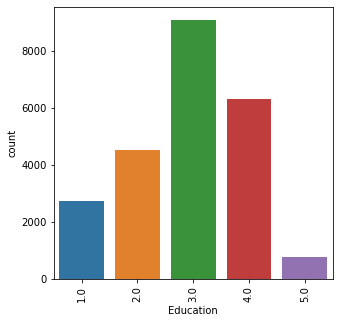

In [24]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Education'])

# Inference
This feature have five levels.They are:
1:'Below College',2:'College',3:'Bachelor',4:'Master',5:'Doctor'.
Many employees have Bachelors level of education.

# Environment satisfaction

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

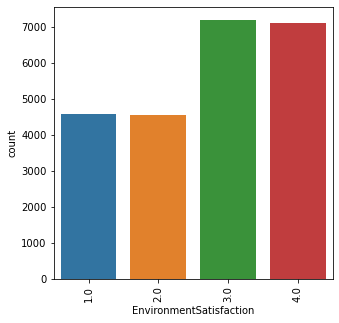

In [25]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['EnvironmentSatisfaction'])

# Inference
It is the satisfaction of the employee with the working environment.This has four levels:
    1:'Low',2:'Medium',3:'High',4:'Very High'
around 7200 employees vote for level 3 & 4 ie they are satisfied with the working environment.Rest of them vote for level 1 & 2                    

# Hourly rate

<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

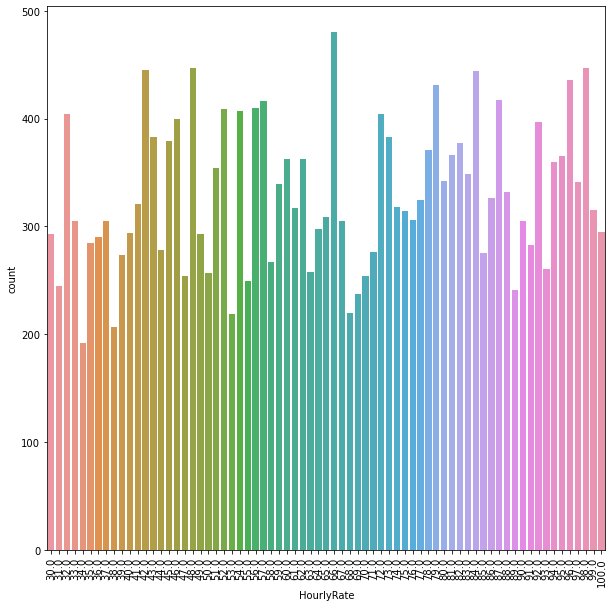

In [26]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['HourlyRate'])

Hourly rate is between 20 to 100.

# Job involvement

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

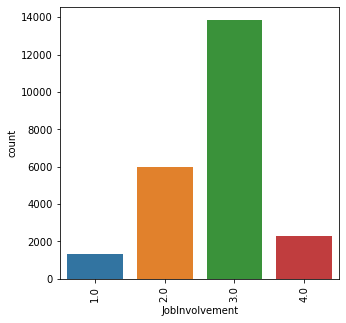

In [27]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobInvolvement'])

# Inference
It contains four level.They are:
     1:'Low',2:'Medium',3:'High',4:'Very High'
Around 13900 are voting for level 3,ie they are highly involved in their job.                        

# Job level

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

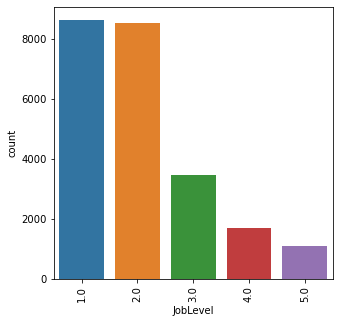

In [28]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobLevel'])

# Inference
It's the position of employees in the company.Around 8700 employees are at 1st and 2nd level.

# Job satisfaction

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

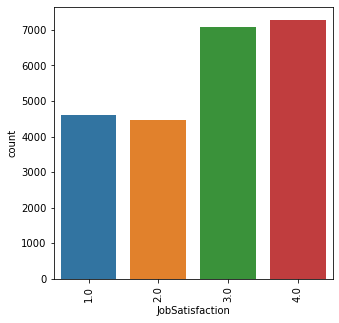

In [29]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobSatisfaction'])

# Inference
It is the satisfaction level of employees in their job.There are four level:
    1:'Low',2:'Medium',3:'High',4:'Very High'
Around 14400 employees are satisfied in their job, ie are voting 3 & 4.                    

# Monthly income

<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

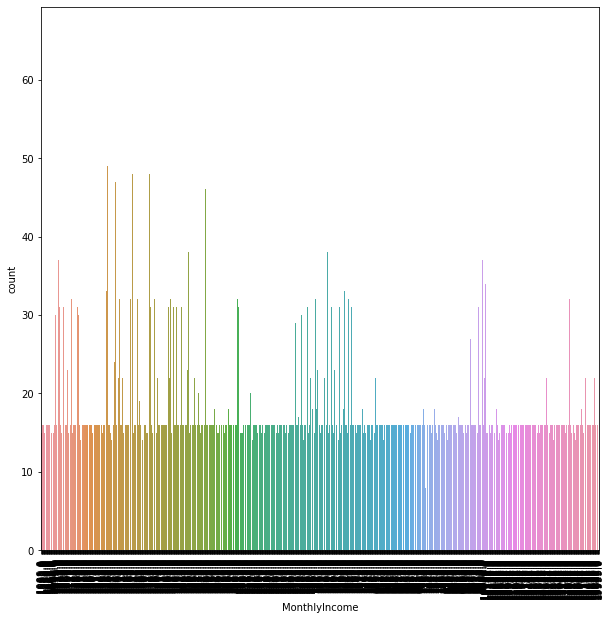

In [30]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['MonthlyIncome'])

# Number of companies worked

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

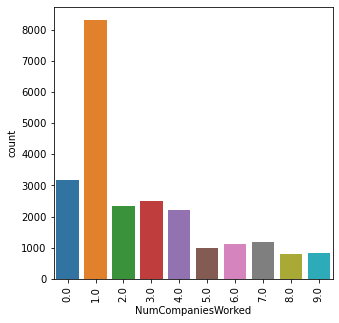

In [31]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['NumCompaniesWorked'])

# Inference
The number of companies in which the emloyees worked before they joined IBM.Different employees worked for nine different companies.Around 8320 employees worked for only 1 company before joining IBM.

# Percentage salary hike

<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

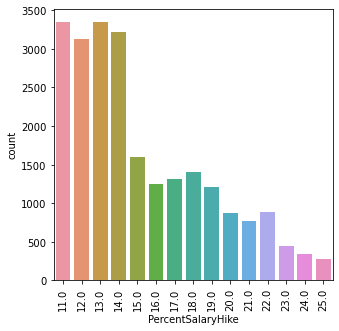

In [32]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['PercentSalaryHike'])

# Inference
It's the percentage of salary hike.The many employees got upto 14% of salary hike every year.

# Performance rating

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

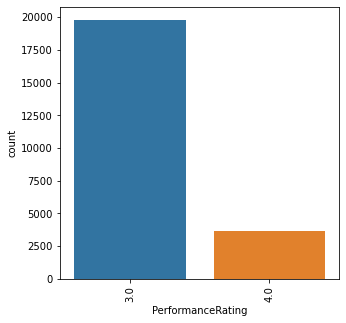

In [33]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['PerformanceRating'])

# Inference
It's the performance of the employee in the company.
1:'Low',2:'Good',3:'Excellent',4:'Outstanding'
All the employees have performance rating 3 and 4,ie all are performing their maximum                

# Relationship satisfaction

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='count'>

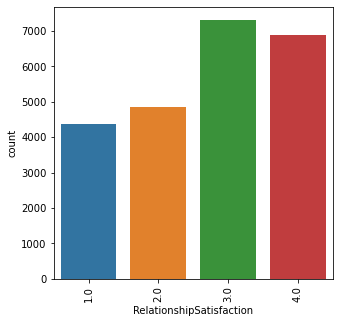

In [34]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['RelationshipSatisfaction'])

# Inference
Contain four levels.
1:'Low',2:'Medium',3:'High',4:'Very High'
Many of them are rating 3 & 4.                

# Stock option level

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

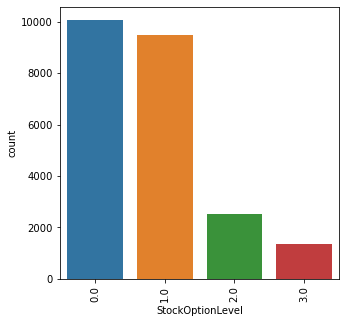

In [35]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['StockOptionLevel'])

# Inference
Stock option plan is an employee benefit plan isssued by the company to encourage employee ownership in the company.


# Total working years

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

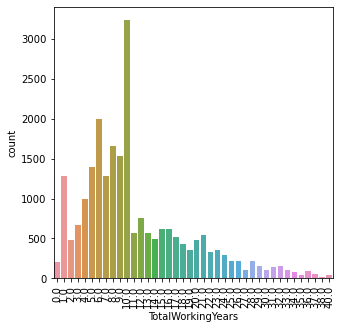

In [36]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['TotalWorkingYears'])

# Inference
Many employees are working for many years.The employees working for 10 years has the higest count.

# Training times last year

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

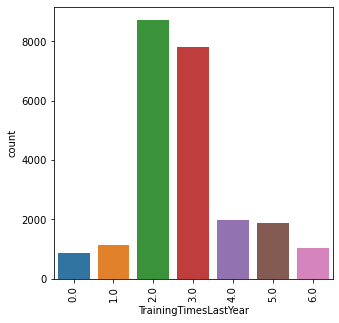

In [37]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['TrainingTimesLastYear'])

# Inference
How much time does the employee got training for last year.
Most of them got 2 to 3 time.

# Work life balance

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

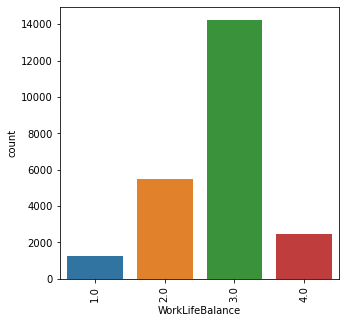

In [38]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['WorkLifeBalance'])

# Inference 
It's the rating given by employees that how their work and personal life is balanced.
It has four level;1:'Low',2:'Good',3:'Better',4:'Best'
 Many of them are rating as 3.               

# Years at company

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

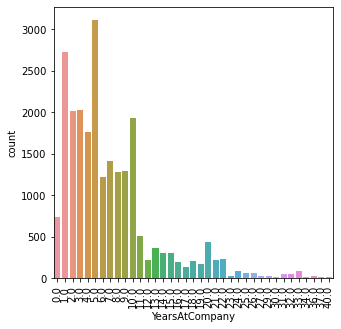

In [39]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsAtCompany'])

# Inference
How many years in which the employee is working for IBM.
Most of the employees are working for less than 11 years.

# Years in current role

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

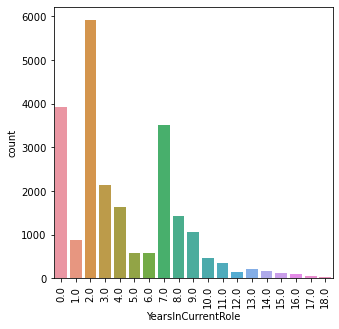

In [40]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsInCurrentRole'])

# Inference
The higest count is for 2 years.

# Years since last promotion

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

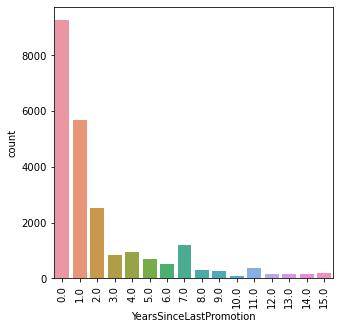

In [41]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsSinceLastPromotion'])

# Inference
It's the years passed since their last promotion.
The higest count is for 0 years.

# Years with current manager

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

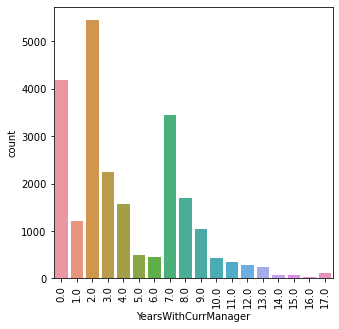

In [42]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['YearsWithCurrManager'])

# Inference
The higest count for working in IBM with current manager is for 2 years.

# Visualization for Categorical Features

# Business travel

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

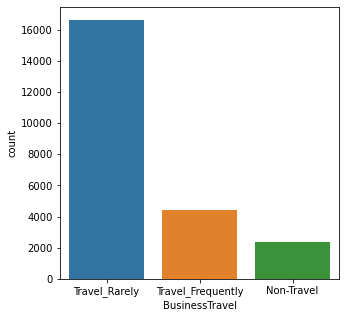

In [43]:
sns.countplot(x='BusinessTravel', data=HR_data)

# Inference
Majority of the employees belong to travel rarely group. This indicates that most of them did not have a job which asked them for frequent travelling.

# Department

<AxesSubplot:xlabel='Department', ylabel='count'>

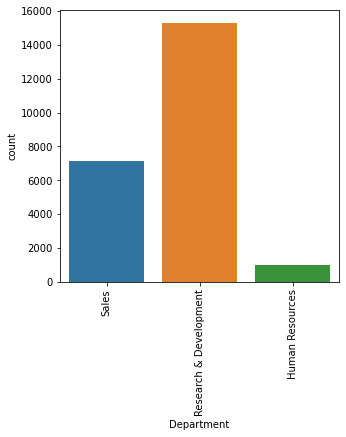

In [44]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Department'])

# Inference
Major employees work under Research & Development department.

# Education field

<AxesSubplot:xlabel='EducationField', ylabel='count'>

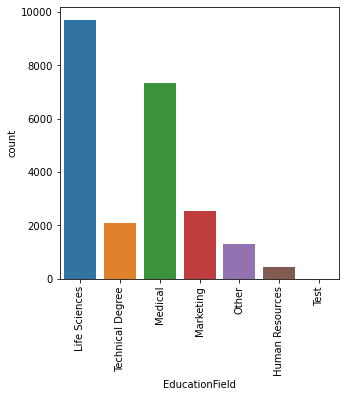

In [45]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['EducationField'])

# Inference
Most of the employees education field are Life science and Medical.

# Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

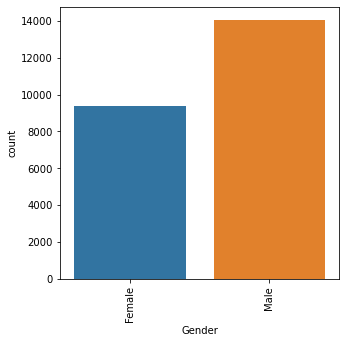

In [46]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Gender'])

# Inference
Majority of the employees working in IBM are males.

# Job role

<AxesSubplot:xlabel='JobRole', ylabel='count'>

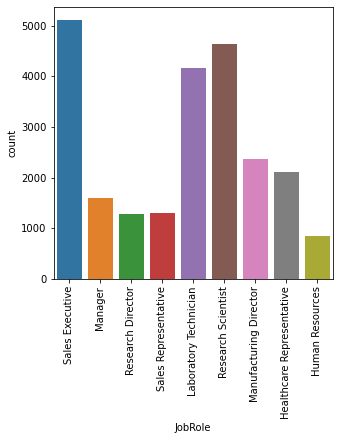

In [47]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['JobRole'])

# Inference
Major job roles of the employees are Sales executive,Research scientist and Laboratory technician.

# Marital status

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

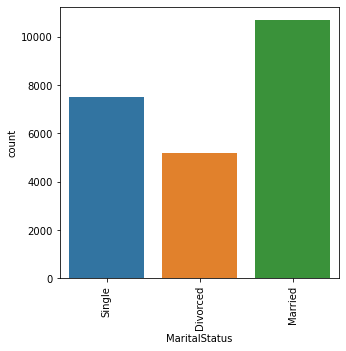

In [48]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['MaritalStatus'])

# Inference
Most of the employees are married.

# Over 18

<AxesSubplot:xlabel='Over18', ylabel='count'>

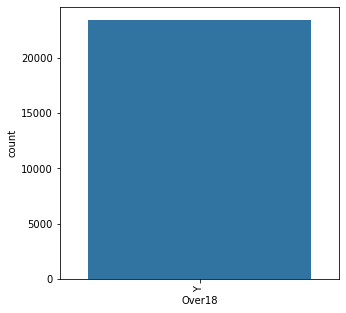

In [49]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Over18'])

# Inference 
All the employees working in the company are above the age of 18.

# Over time

<AxesSubplot:xlabel='OverTime', ylabel='count'>

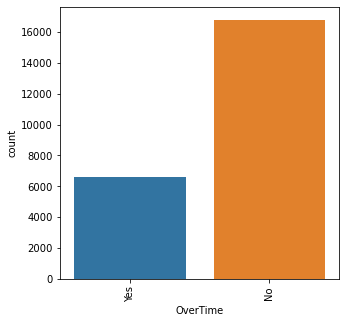

In [50]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['OverTime'])

# Inference
Only around 29% of the employees are working over time.

# Employee source

<AxesSubplot:xlabel='Employee Source', ylabel='count'>

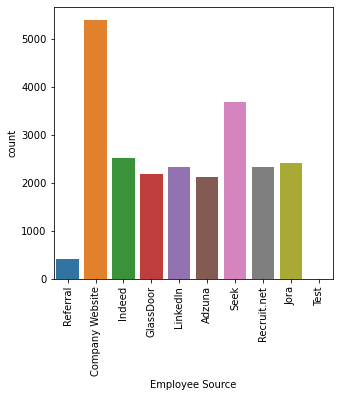

In [51]:
plt.figure(figsize=[5,5])
plt.xticks(rotation='vertical')
sns.countplot(HR_data['Employee Source'])

# Inference
The major source of employees are from company website.

# Cor-relation between features

<AxesSubplot:>

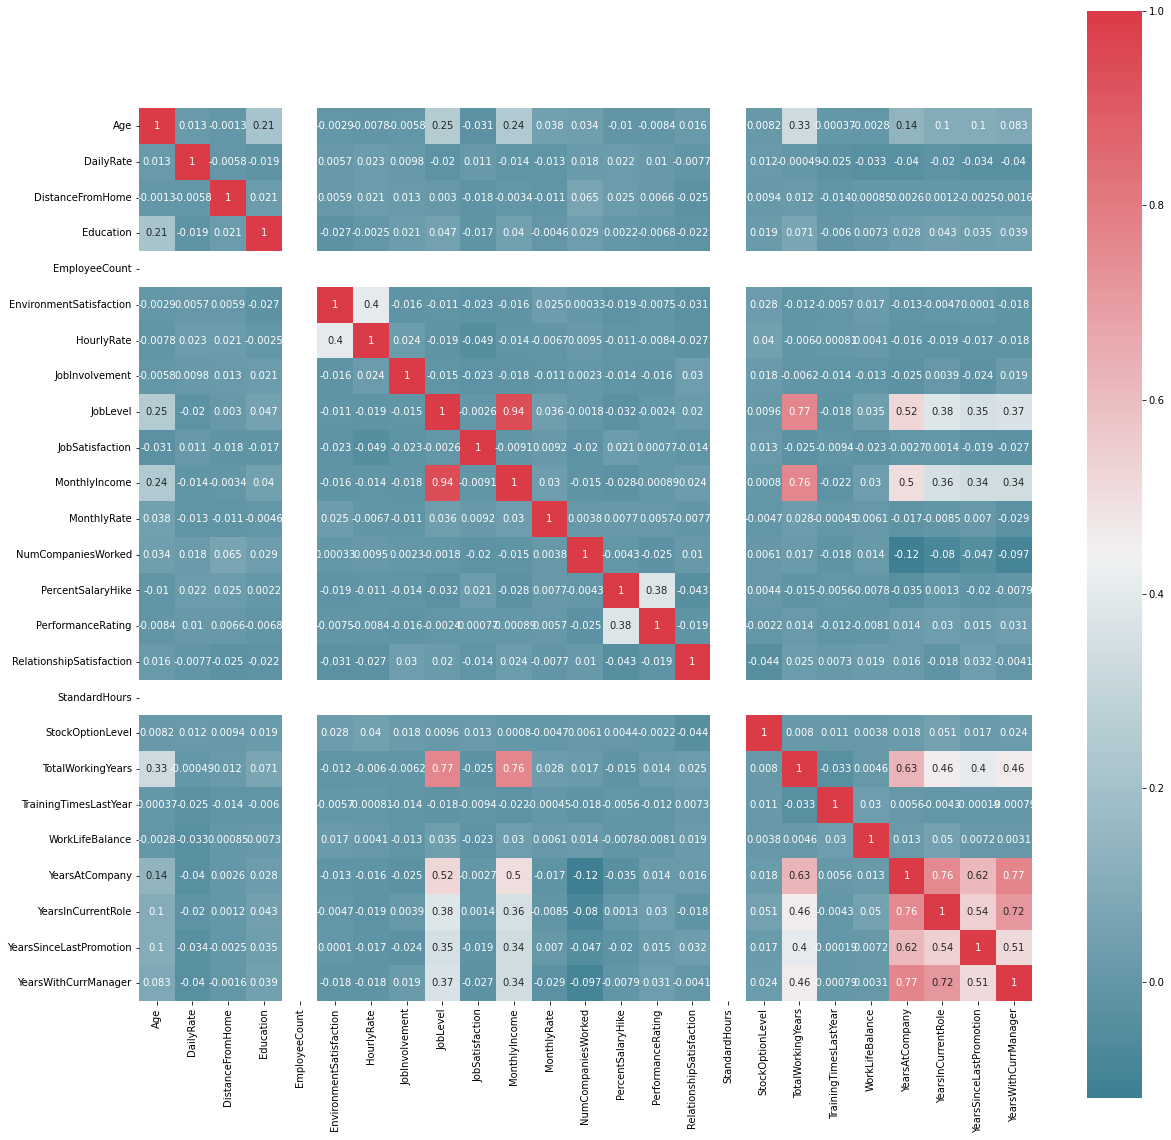

In [52]:
f, ax = plt.subplots(figsize=(20, 20))
corr = HR_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)

<AxesSubplot:>

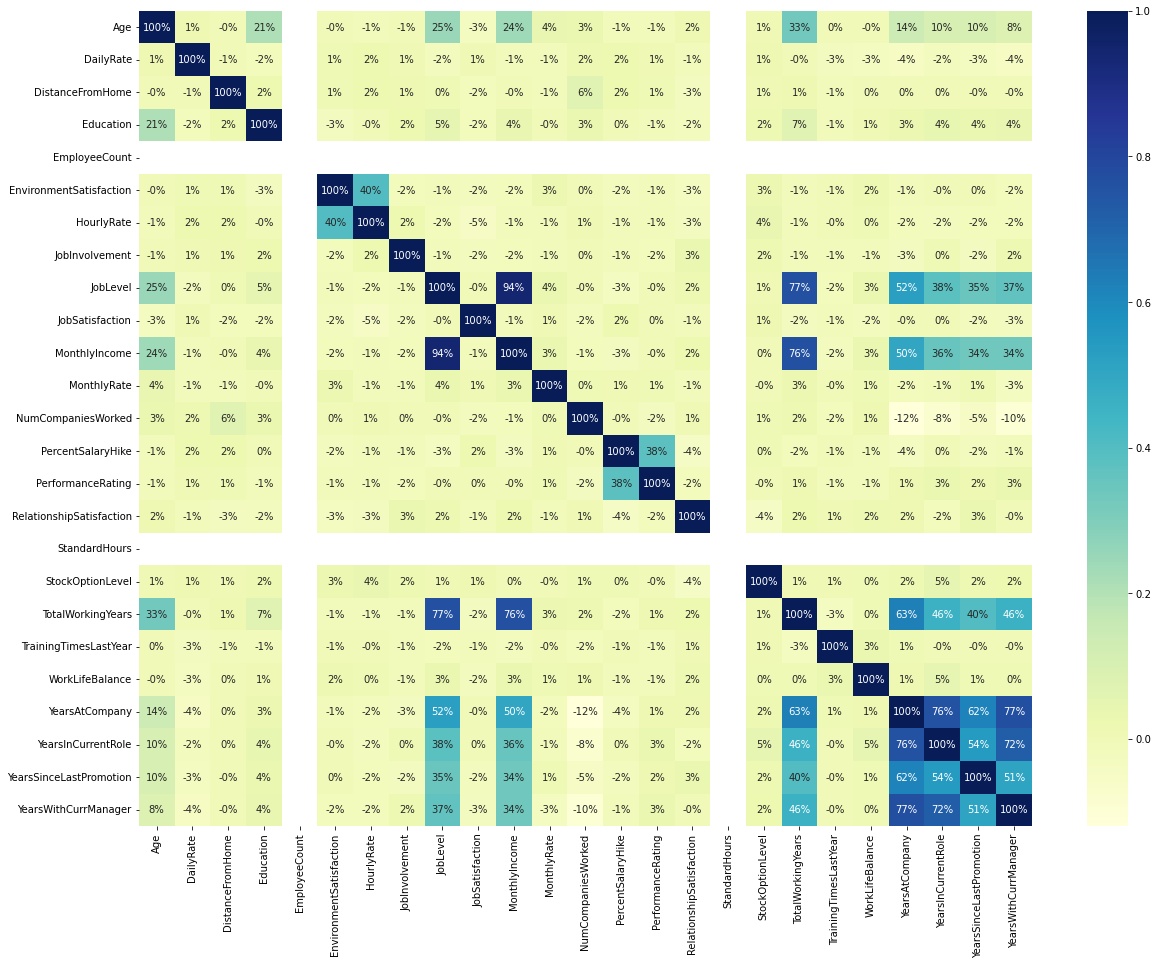

In [53]:
#cor-relation in percentage values
corr=HR_data.corr()
import  seaborn as sns 
plt.figure(figsize=[20,15])
sns.heatmap(corr,annot=True,cmap='YlGnBu',fmt='.0%')

# Inference
From the correlation table we see that monthly income is highly correlated with job level as expected as senior employees will definately earn more. However, daily rate, hourly rate and monthly rate are barely correlated with anything. We will be using monthly income in later analysis as a measurement of salary and get rid of other income related variables.Employee count and Standard hours also does not have any effect.

SOME OTHER INFERENCES FROM THE ABOVE HEATMAP:
1)Job level and total working years are highly correlated which is expected as senior employees must have worked for a larger span of time
2)Monthly Income and total working years are highly correlated which is expected as the employee with more work experince will earn more salary.
3)Years in current role and years at company are highly correlated.
4)Years with current manager and years at company are highly correlated.
5)Self relation ie of a feature to itself is equal to 1 as expected.

# Bivariate Visulaization

# Plotting the Features against the 'Target' variable.

# Age vs Attririon

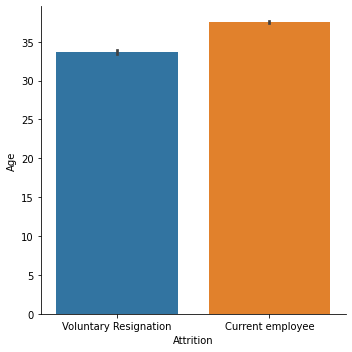

In [54]:
sns.factorplot(data=HR_data,y='Age',x='Attrition',aspect=1,kind='bar')

# Inference
This graph shows that younger age group are leaving the company(ie below 35) and that the people with higher age have lesser tendency to leave the company which makes sense as they may have settled in the organisation.

# Bussines travel vs Attrition

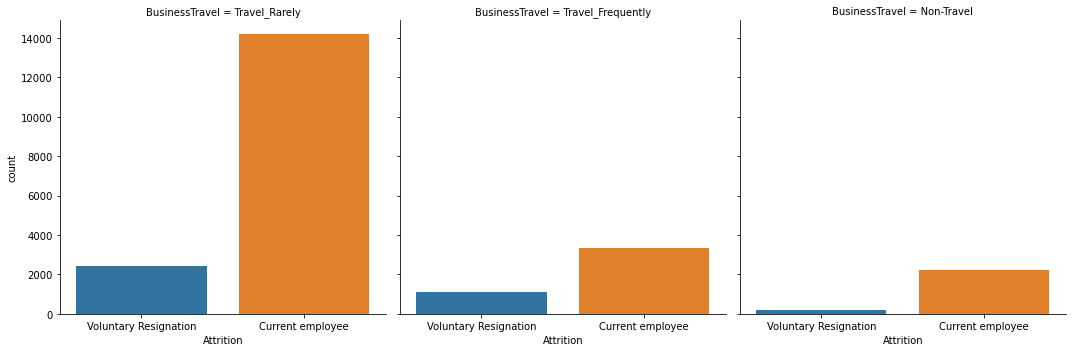

In [55]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='BusinessTravel')

In [56]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.BusinessTravel],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
BusinessTravel,,
Non-Travel,0.920217,0.079783
Travel_Frequently,0.753117,0.246883
Travel_Rarely,0.853883,0.146117
All,0.841683,0.158317


# Inference
The employees who travel frequently have higher percentage(24%) of leaving the company. 

# Department vs Attrition

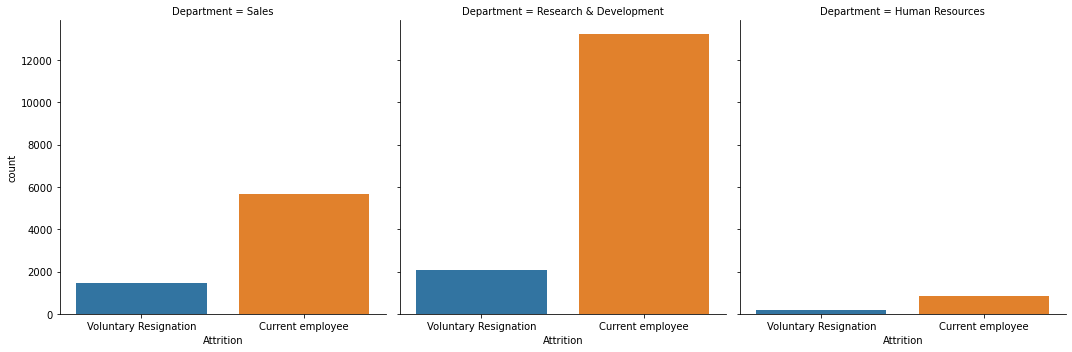

In [57]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Department')

In [58]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Department],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
Department,,
Human Resources,0.808636,0.191364
Research & Development,0.864952,0.135048
Sales,0.796543,0.203457
All,0.841705,0.158295


# Inference
The higest percentage of voluntary resignation happens in sales department(20%).They may be leaving the company due to reasons like greater workfoce,lower salary,etc.
The currently working employee percent is higher in research & development department(86%).

# Distance from home vs Attrition

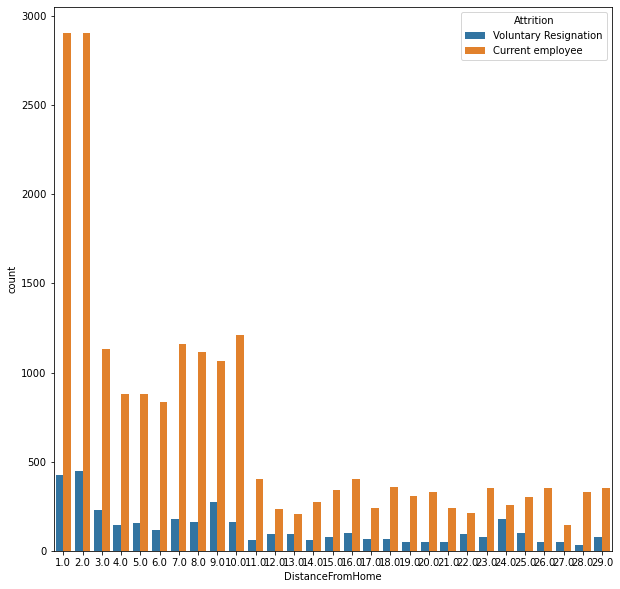

In [59]:
plt.figure(figsize=[10,10])
sns.countplot(x='DistanceFromHome',hue='Attrition',data=HR_data)
plt.show()

In [60]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.DistanceFromHome],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
DistanceFromHome,,
1.0,0.872596,0.127404
2.0,0.866826,0.133174
3.0,0.832842,0.167158
4.0,0.858398,0.141602
5.0,0.847490,0.152510
6.0,0.878692,0.121308
7.0,0.868263,0.131737
8.0,0.873923,0.126077
9.0,0.797156,0.202844


# Inference
The employees with greater distance are leaving company.

# Education vs Attrition

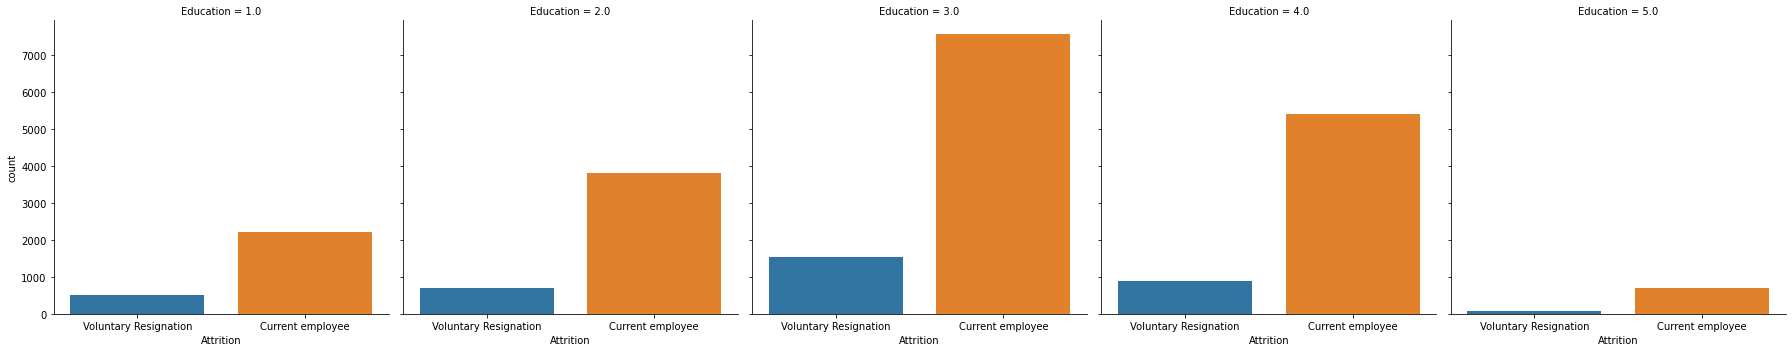

In [61]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Education')

In [62]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Education],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
Education,,
1.0,0.816244,0.183756
2.0,0.845438,0.154562
3.0,0.831757,0.168243
4.0,0.857324,0.142676
5.0,0.896732,0.103268
All,0.841613,0.158387


# Inference
From this graph we can observe that the employees with education level 1 have the higher percentage(18%) of voluntary resignation(ie they are leaving the company)

# Education field vs Attrition

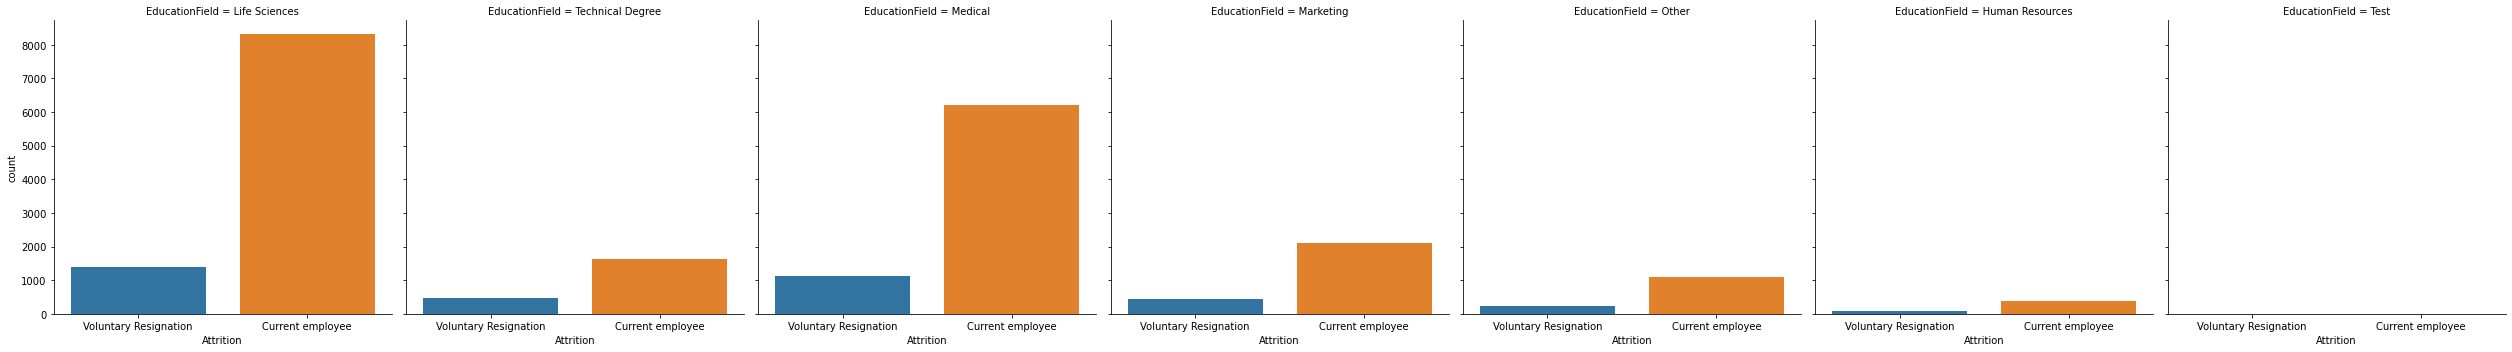

In [63]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='EducationField')

In [64]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.EducationField],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
EducationField,,
Human Resources,0.825112,0.174888
Life Sciences,0.857408,0.142592
Marketing,0.826908,0.173092
Medical,0.848534,0.151466
Other,0.824561,0.175439
Technical Degree,0.776234,0.223766
Test,1.000000,0.000000
All,0.841633,0.158367


# Inference
The employees having technical degree have higher ratio(22%) of voluntary resignation.The employee with life science as the education field have lesser chance of leaving the company.

# Environment satisfaction vs Attrition

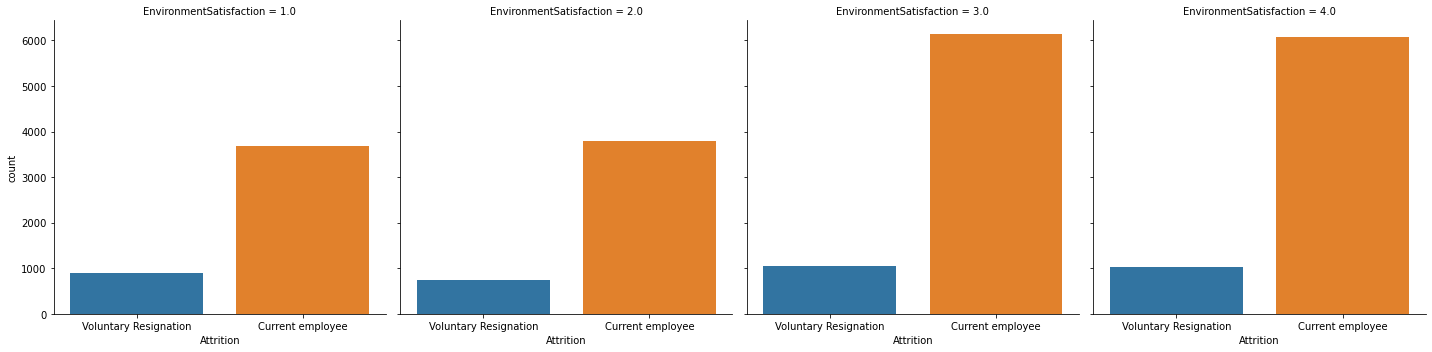

In [65]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='EnvironmentSatisfaction')

In [66]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
EnvironmentSatisfaction,,
1.0,0.806114,0.193886
2.0,0.836897,0.163103
3.0,0.853011,0.146989
4.0,0.856037,0.143963
All,0.841633,0.158367


# Inference
Again we can notice that the relatively high percent of 'current employee' in employees with higher grade of environment satisfacftion.This means that they are satisfied with their working environment.

# Gender vs Attrition

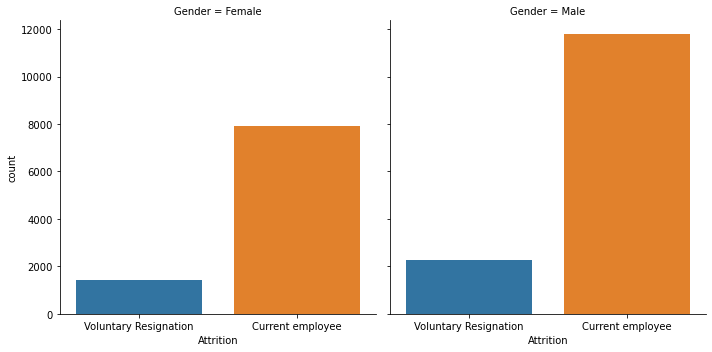

In [67]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Gender')

In [68]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.Gender],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
Gender,,
Female,0.846433,0.153567
Male,0.838363,0.161637
All,0.841591,0.158409


# Inference
About 85 % of females want to stay in the company while only 15 % want to leave. All in all 84 % of employees want to be in the company with only being 16% wanting to leave the company.

# Job involvement vs Attrition

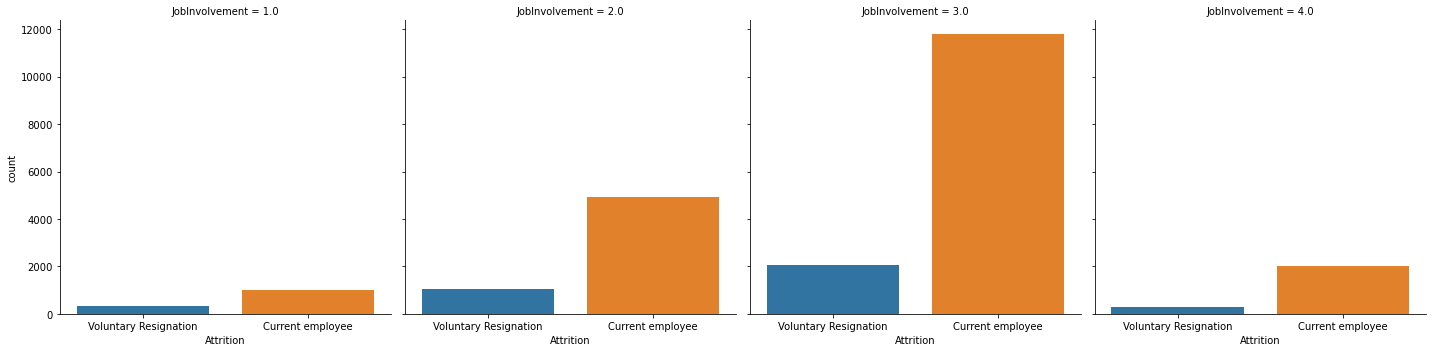

In [69]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobInvolvement')

In [70]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobInvolvement],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
JobInvolvement,,
1.0,0.758908,0.241092
2.0,0.824170,0.175830
3.0,0.850903,0.149097
4.0,0.878455,0.121545
All,0.841591,0.158409


# Inference
Again we can notice that the relatively high percent of 'current employee' in employees with higher grade of job involvement.This means that they are doing  their maximum.

# Job level vs Attrition

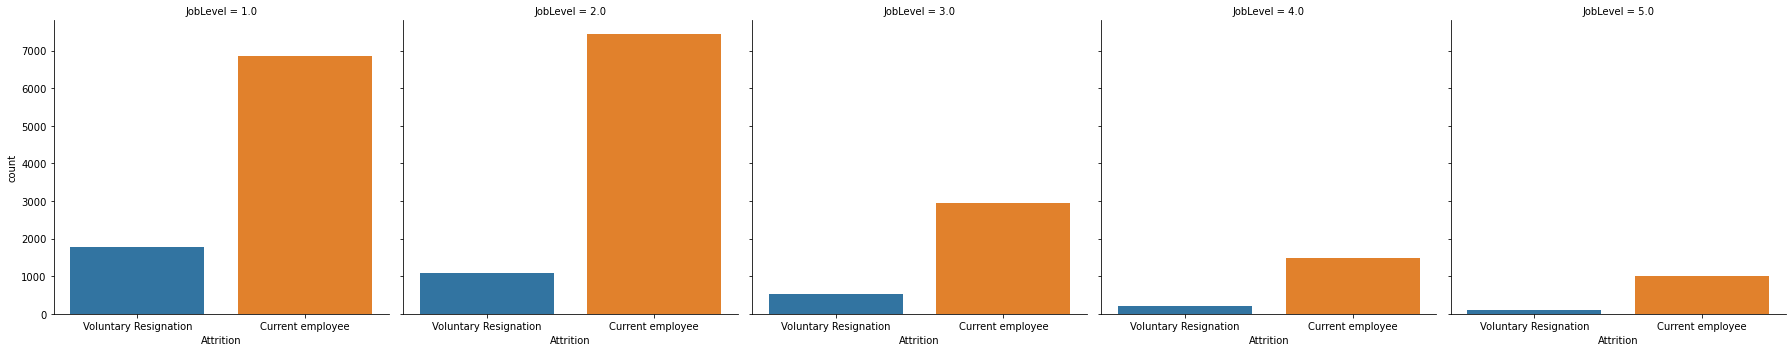

In [71]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobLevel')

In [72]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobLevel],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
JobLevel,,
1.0,0.794046,0.205954
2.0,0.871993,0.128007
3.0,0.846818,0.153182
4.0,0.870720,0.129280
5.0,0.918573,0.081427
All,0.841604,0.158396


# Inference
There is a higher rate of voluntary resignation in employees having job level 1(20%).

# Job role vs Attrition

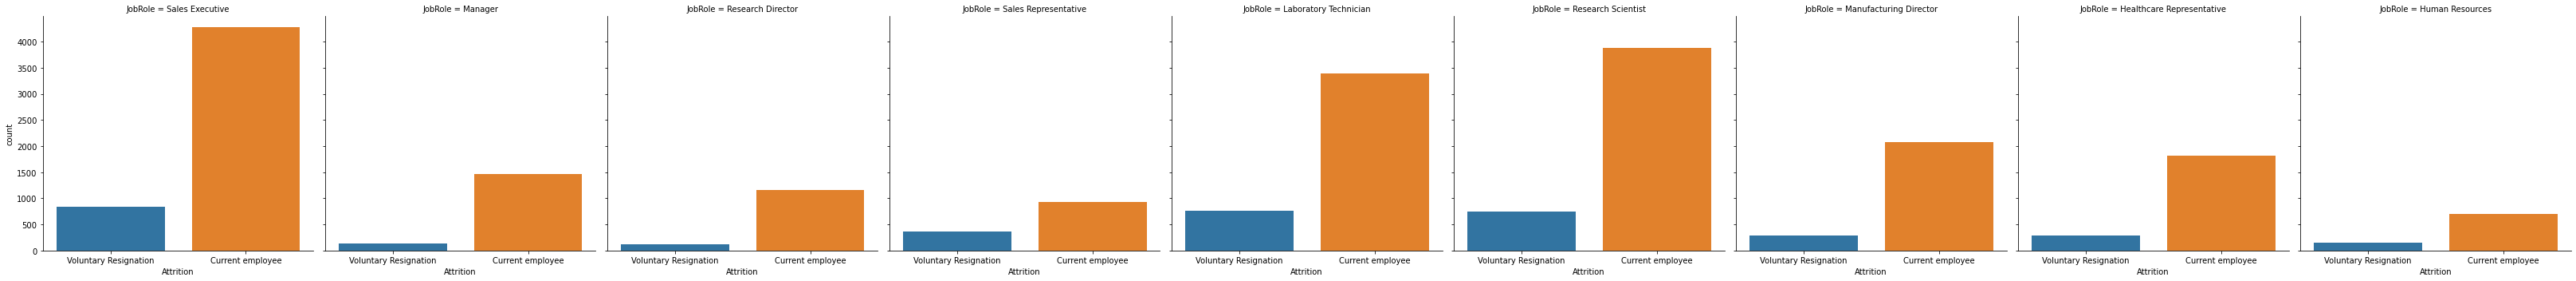

In [73]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobRole')

In [74]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobRole],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
JobRole,,
Healthcare Representative,0.860675,0.139325
Human Resources,0.822485,0.177515
Laboratory Technician,0.817460,0.182540
Manager,0.913179,0.086821
Manufacturing Director,0.877104,0.122896
Research Director,0.902875,0.097125
Research Scientist,0.838299,0.161701
Sales Executive,0.836727,0.163273
Sales Representative,0.718558,0.281442


# Inference
The lower ratio of voluntary resignation happens in manager role.The higher is in sales representatives,this may due to workforce,low salary,etc.

# Job satisfaction vs Attrition

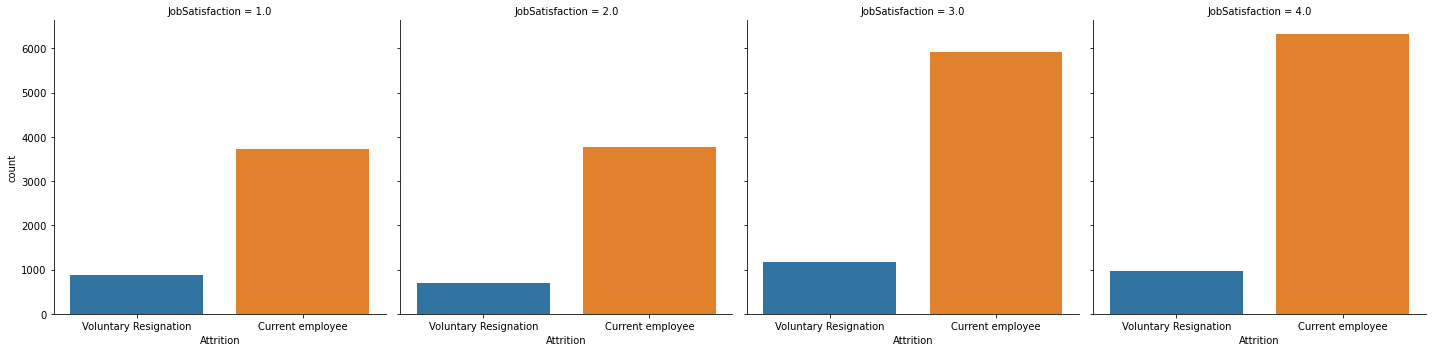

In [75]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='JobSatisfaction')

In [76]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.JobSatisfaction],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
JobSatisfaction,,
1.0,0.807868,0.192132
2.0,0.844634,0.155366
3.0,0.834721,0.165279
4.0,0.868161,0.131839
All,0.841719,0.158281


# Inference
 Note that for higher values of job satisfaction( ie more a person is satisfied with his job) lesser percent of voluntary resignation which is quite obvious as highly contented workers will obvioulsy not like to leave the company.

# Marital status vs Attrition

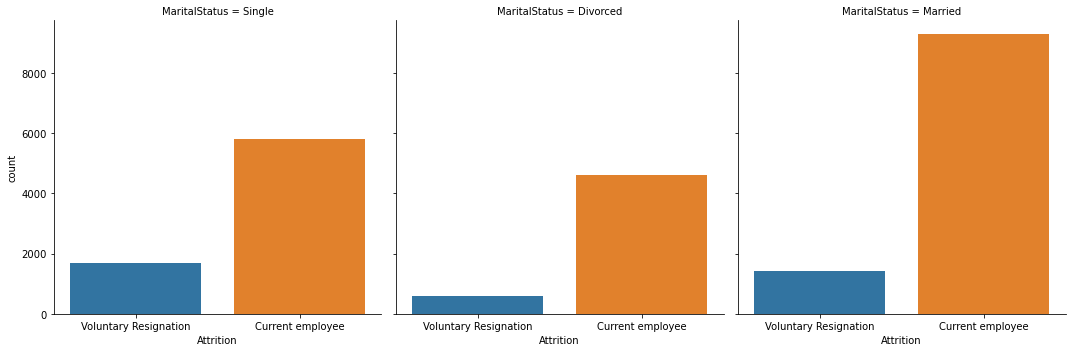

In [77]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='MaritalStatus')

In [78]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.MaritalStatus],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
MaritalStatus,,
Divorced,0.884217,0.115783
Married,0.867657,0.132343
Single,0.774710,0.225290
All,0.841577,0.158423


# Inference
Single peopel are more likely to quit compared to married and divorced people.

# Over time vs Attrition

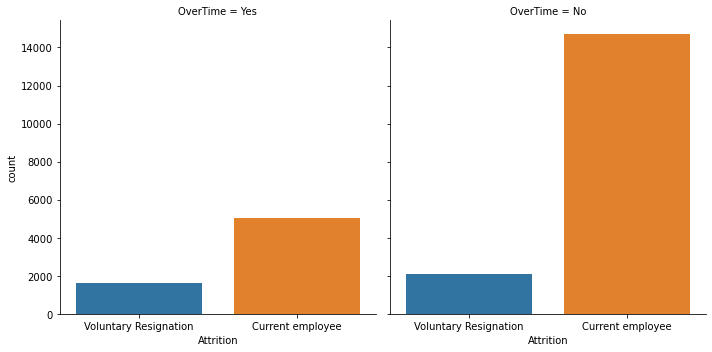

In [79]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='OverTime')

In [80]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.OverTime],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
OverTime,,
No,0.875335,0.124665
Yes,0.756182,0.243818
All,0.841584,0.158416


# Inference
The over time working employees are more likely to quit.

# Performance rating vs Attrition

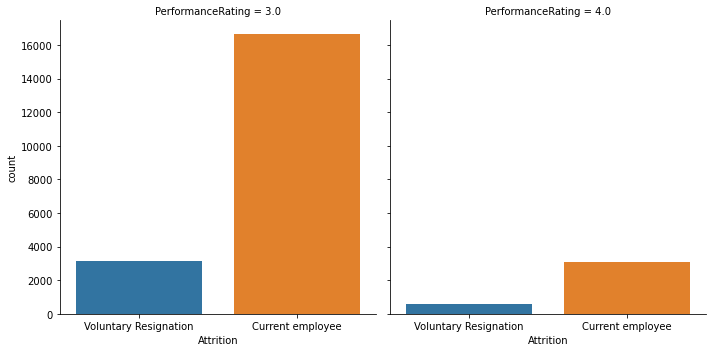

In [81]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='PerformanceRating')

In [82]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.PerformanceRating],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
PerformanceRating,,
3.0,0.840730,0.159270
4.0,0.847341,0.152659
All,0.841755,0.158245


# Inference
Attrition ratio for both performance level is equal .

# Relationship satisfaction vs Attrition

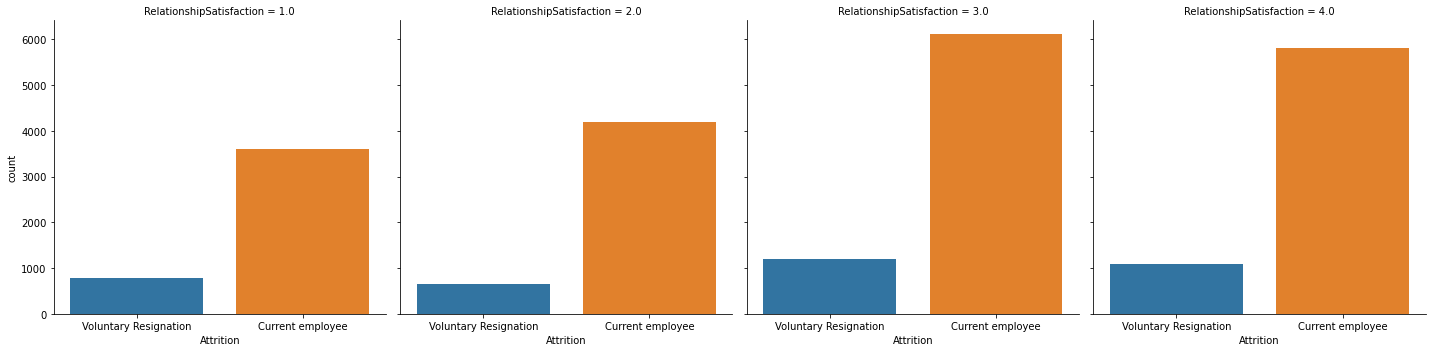

In [83]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='RelationshipSatisfaction')

In [84]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.RelationshipSatisfaction],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
RelationshipSatisfaction,,
1.0,0.822106,0.177894
2.0,0.866143,0.133857
3.0,0.835590,0.164410
4.0,0.843282,0.156718
All,0.841647,0.158353


# Inference
The lower ratio of voluntary resignation is with level 2.

# Stock option level vs Attrition

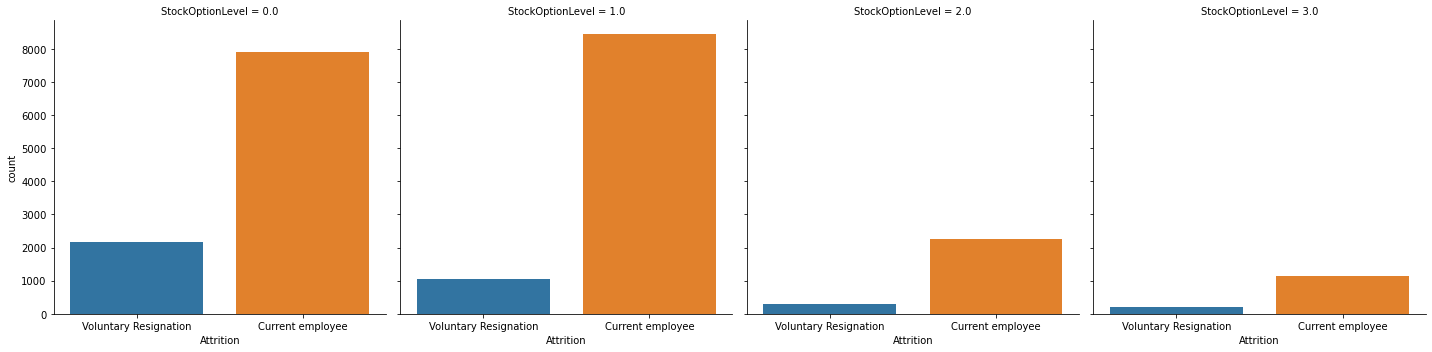

In [85]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='StockOptionLevel')

In [86]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.StockOptionLevel],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
StockOptionLevel,,
0.0,0.784770,0.215230
1.0,0.889674,0.110326
2.0,0.887485,0.112515
3.0,0.841909,0.158091
All,0.841633,0.158367


# Inference
The level 0 has higher ratio of voluntary resignation.

# Training times last year vs Attrition

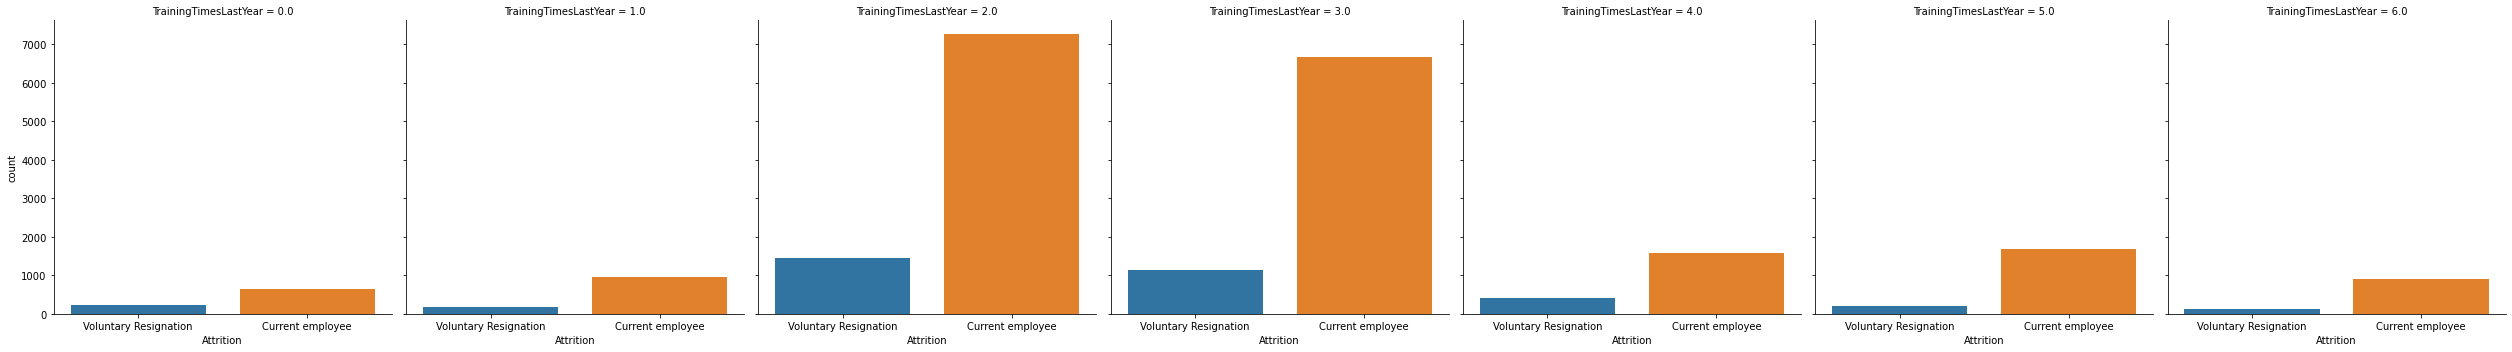

In [87]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='TrainingTimesLastYear')

In [88]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.TrainingTimesLastYear],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
TrainingTimesLastYear,,
0.0,0.750288,0.249712
1.0,0.842667,0.157333
2.0,0.832626,0.167374
3.0,0.855312,0.144688
4.0,0.797256,0.202744
5.0,0.898512,0.101488
6.0,0.871401,0.128599
All,0.841662,0.158338


# Inference
The employees who does not get any training during last year are most likely to resing.

# Work life balance vs Attrition

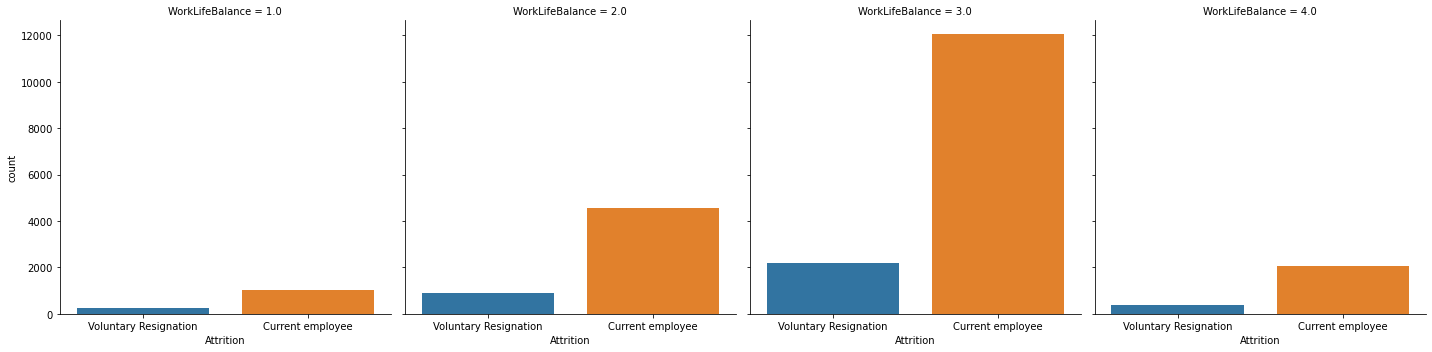

In [89]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='WorkLifeBalance')

In [90]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.WorkLifeBalance],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
WorkLifeBalance,,
1.0,0.799685,0.200315
2.0,0.835799,0.164201
3.0,0.846132,0.153868
4.0,0.849815,0.150185
All,0.841584,0.158416


# Inference
The lower rating employees are likely to quit the company.They have bad level of work-life balance.

# Number of companies worked vs Attrition

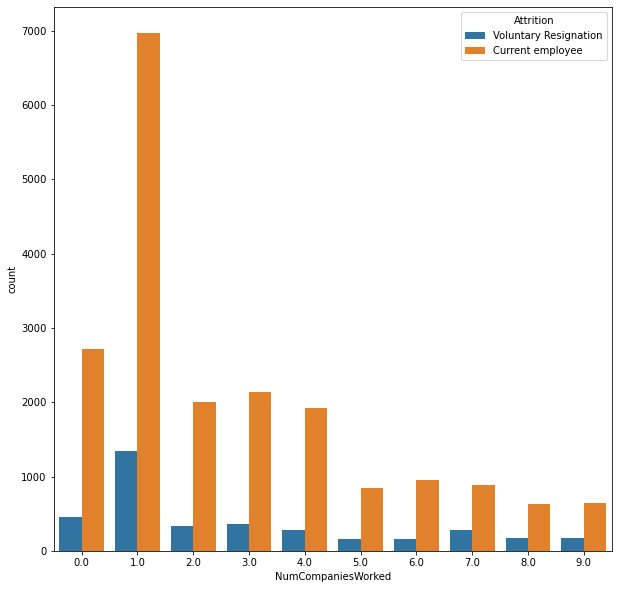

In [91]:
plt.figure(figsize=[10,10])
sns.countplot(x='NumCompaniesWorked',hue='Attrition',data=HR_data)
plt.show()

In [92]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.NumCompaniesWorked],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
NumCompaniesWorked,,
0.0,0.857278,0.142722
1.0,0.838912,0.161088
2.0,0.857940,0.142060
3.0,0.854466,0.145534
4.0,0.872678,0.127322
5.0,0.837325,0.162675
6.0,0.856498,0.143502
7.0,0.761538,0.238462
8.0,0.786885,0.213115


# Inference
The employees who have worked for many companies have higher chance of leaving the company.

# Years with current manager vs Attrition

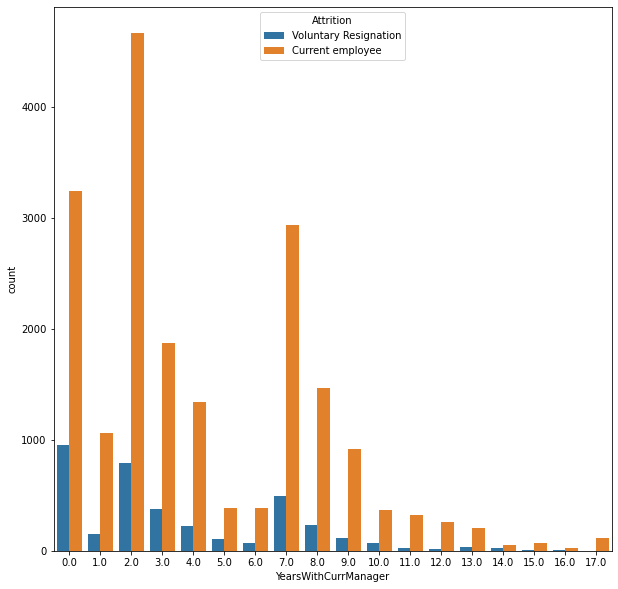

In [93]:
plt.figure(figsize=[10,10])
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=HR_data)
plt.show()

In [94]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.YearsWithCurrManager],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
YearsWithCurrManager,,
0.0,0.773009,0.226991
1.0,0.874384,0.125616
2.0,0.854918,0.145082
3.0,0.833481,0.166519
4.0,0.856688,0.143312
5.0,0.778226,0.221774
6.0,0.838074,0.161926
7.0,0.855064,0.144936
8.0,0.863208,0.136792


In [95]:
# Inference


# Years since last promotion vs Attrition

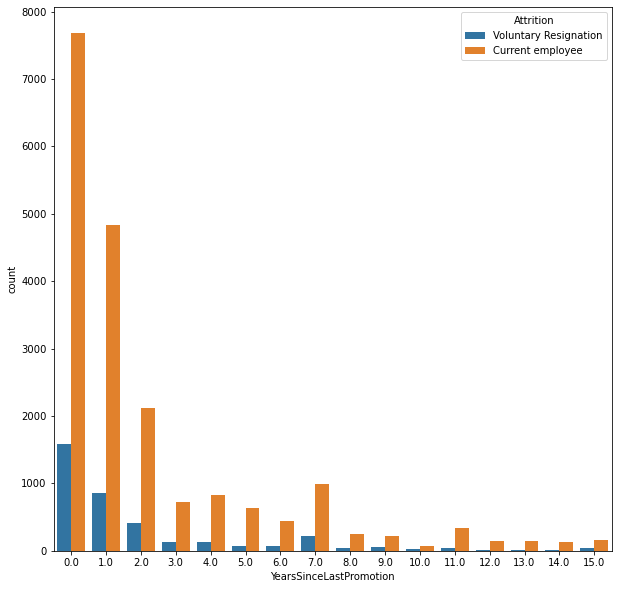

In [96]:
plt.figure(figsize=[10,10])
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=HR_data)
plt.show()

In [97]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.YearsSinceLastPromotion],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
YearsSinceLastPromotion,,
0.0,0.829016,0.170984
1.0,0.850053,0.149947
2.0,0.837347,0.162653
3.0,0.852906,0.147094
4.0,0.859375,0.140625
5.0,0.897616,0.102384
6.0,0.866142,0.133858
7.0,0.819605,0.180395
8.0,0.859155,0.140845


# Years in current role vs Attrition

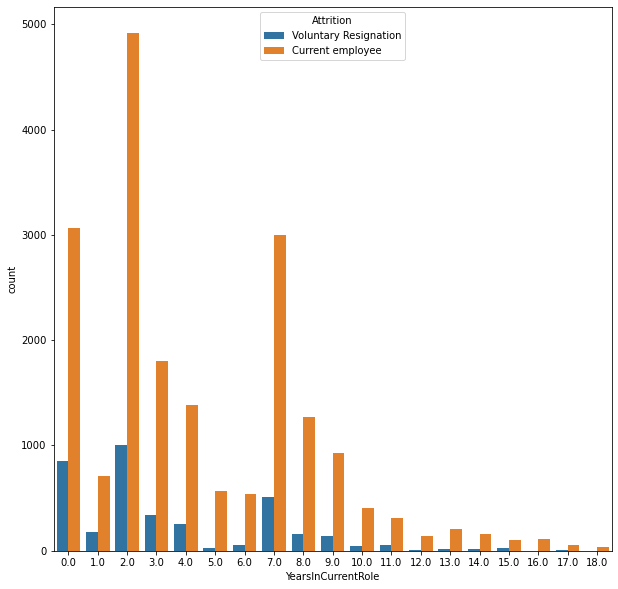

In [98]:
plt.figure(figsize=[10,10])
sns.countplot(x='YearsInCurrentRole',hue='Attrition',data=HR_data)
plt.show()

In [99]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.YearsInCurrentRole],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
YearsInCurrentRole,,
0.0,0.782254,0.217746
1.0,0.803612,0.196388
2.0,0.829705,0.170295
3.0,0.840187,0.159813
4.0,0.844553,0.155447
5.0,0.962838,0.037162
6.0,0.905245,0.094755
7.0,0.853485,0.146515
8.0,0.887798,0.112202


# Years at company vs Attrition

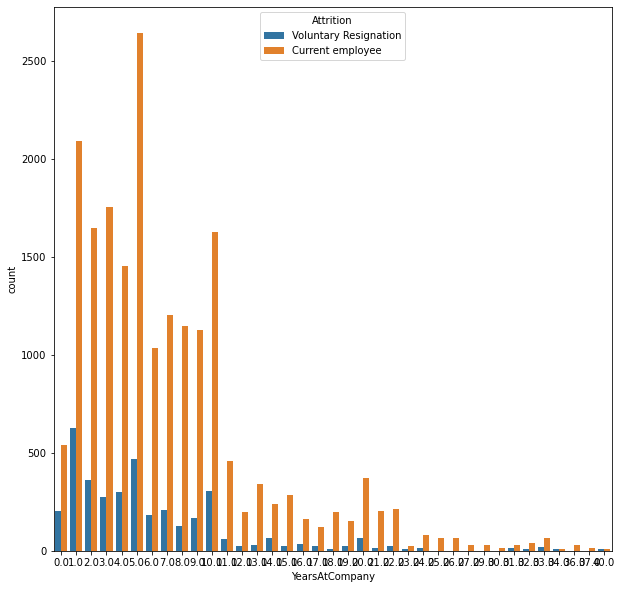

In [100]:
plt.figure(figsize=[10,10])
sns.countplot(x='YearsAtCompany',hue='Attrition',data=HR_data)
plt.show()

In [101]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.YearsAtCompany],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
YearsAtCompany,,
0.0,0.727027,0.272973
1.0,0.769429,0.230571
2.0,0.820040,0.179960
3.0,0.864825,0.135175
4.0,0.828962,0.171038
5.0,0.849245,0.150755
6.0,0.851396,0.148604
7.0,0.851878,0.148122
8.0,0.898824,0.101176


# Total working years vs Attrition

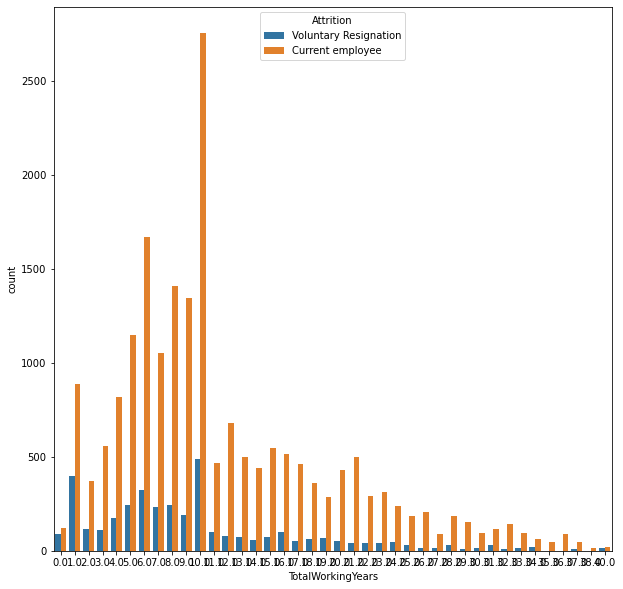

In [102]:
plt.figure(figsize=[10,10])
sns.countplot(x='TotalWorkingYears',hue='Attrition',data=HR_data)
plt.show()

In [103]:
pd.crosstab(columns=[HR_data.Attrition],index=[HR_data.TotalWorkingYears],margins=True,normalize='index')

Attrition,Current employee,Voluntary Resignation
TotalWorkingYears,,
0.0,0.578947,0.421053
1.0,0.690328,0.309672
2.0,0.763975,0.236025
3.0,0.834328,0.165672
4.0,0.825605,0.174395
5.0,0.824838,0.175162
6.0,0.837770,0.162230
7.0,0.819315,0.180685
8.0,0.852390,0.147610


# Employee Source vs Attrition

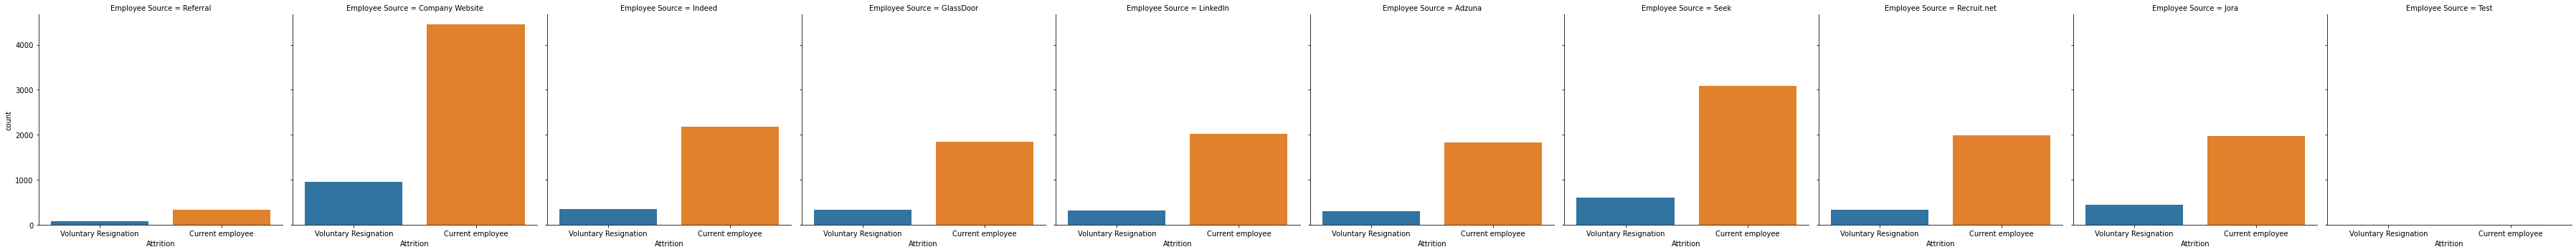

In [104]:
sns.factorplot(data=HR_data,kind='count',x='Attrition',col='Employee Source')

# Inference
The higest ratio of voluntary resignation is by employees who have  entered by referal(20%).

# Age vs Joblevel

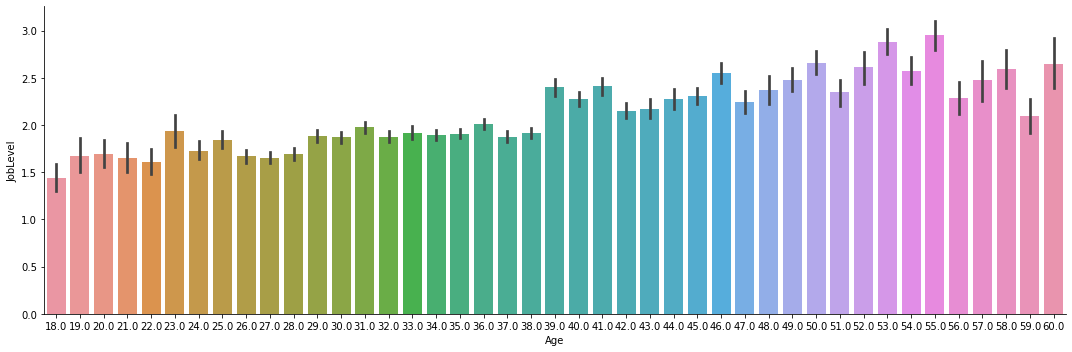

In [105]:
sns.factorplot(x = 'Age', y='JobLevel', kind = 'bar', data=HR_data, aspect = 3)

In [106]:
pd.crosstab(columns=[HR_data.JobLevel],index=[HR_data.Age],margins=True,normalize='index')

JobLevel,1.0,2.0,3.0,4.0,5.0
Age,,,,,
18.0,0.692913,0.244094,0.000000,0.062992,0.000000
19.0,0.608392,0.223776,0.111888,0.000000,0.055944
20.0,0.628571,0.137143,0.142857,0.091429,0.000000
21.0,0.690141,0.117371,0.117371,0.000000,0.075117
22.0,0.677043,0.159533,0.038911,0.124514,0.000000
23.0,0.569507,0.179372,0.071749,0.107623,0.071749
24.0,0.557692,0.252404,0.112981,0.057692,0.019231
25.0,0.406250,0.439904,0.076923,0.057692,0.019231
26.0,0.522876,0.352941,0.084967,0.013072,0.026144


# Inference
Younger age group employees (ie between 18 to 28)are in job level 1.

# Job level vs Monthly income

Text(0.5, 1.0, 'Job level vs Monthly income')

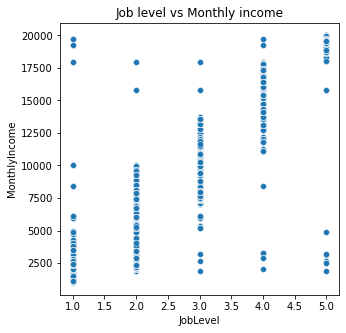

In [107]:
sns.scatterplot(data=HR_data,x='JobLevel',y='MonthlyIncome')
plt.title("Job level vs Monthly income")  

In [108]:
HR_data.groupby(['JobLevel'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
JobLevel,
1.0,2817.804423
2.0,5506.260620
3.0,9811.337846
4.0,15459.941627
5.0,19051.022894


# Inference
The employees with job level 5 have highest salary which make a sense that job level 5 is the highest position in the company.

# Job level vs Total working years

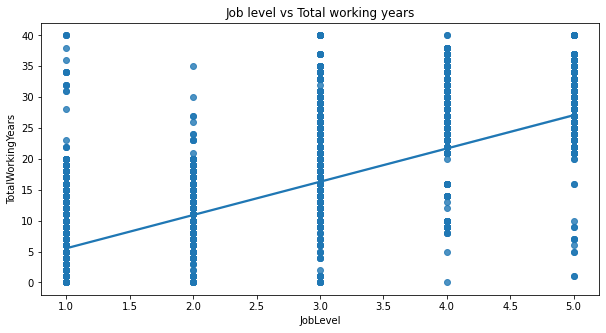

In [109]:
plt.figure(figsize=(10,5))
sns.regplot(data=HR_data,x='JobLevel',y='TotalWorkingYears')
plt.title("Job level vs Total working years")
plt.show()

In [110]:
HR_data.groupby(['JobLevel'])['TotalWorkingYears'].mean().to_frame()

,TotalWorkingYears
JobLevel,
1.0,6.015976
2.0,10.387188
3.0,14.954506
4.0,25.253538
5.0,26.073193


# Inference
The employees with greater working years are in job level 5.

# Age vs Monthly income

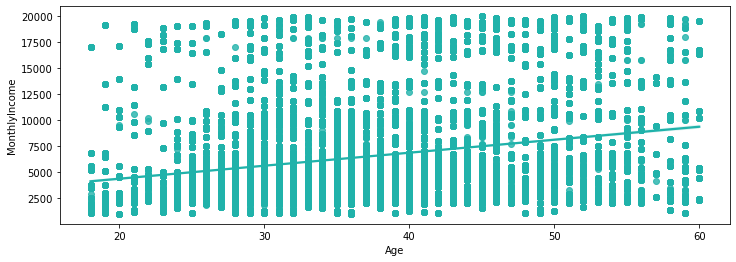

In [111]:
plt.figure(figsize = (12,4))
sns.regplot(x= 'Age', y = 'MonthlyIncome' , data =HR_data,color='lightseagreen')
plt.show()

In [112]:
HR_data.groupby(['Age'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
Age,
18.0,3677.409449
19.0,5135.928571
20.0,5151.172414
21.0,5320.370892
22.0,5129.976654
23.0,5945.497758
24.0,5033.247596
25.0,5538.845783
26.0,4822.352941


# Inference
The monthly salary is low for younger age employees.

# Performance rating vs Percentage salary hike

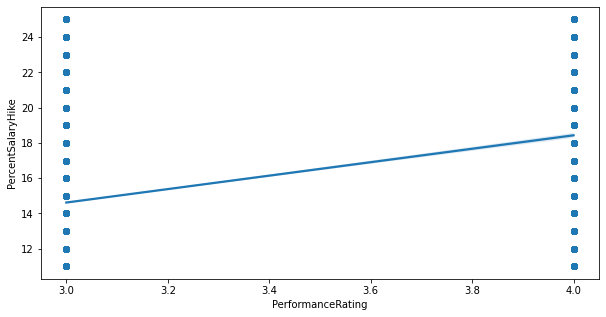

In [113]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'PerformanceRating', y = 'PercentSalaryHike' , data = HR_data)
plt.show()

In [114]:
HR_data.groupby(['PerformanceRating'])['PercentSalaryHike'].mean().to_frame()

,PercentSalaryHike
PerformanceRating,
3.0,14.620521
4.0,18.430579


# Inference
There is a linear relationship between performance rating and percentage salary hike.
The employees with performance rating 4 has 18% salary hike.

# Age vs Education

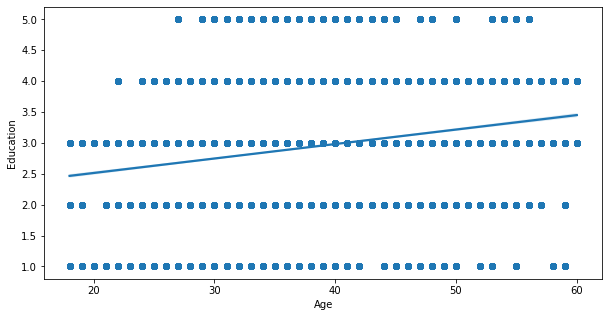

In [115]:
plt.figure(figsize = (10,5))
sns.regplot(x= 'Age',y = 'Education',data = HR_data)
plt.show()

In [116]:
HR_data.groupby(['Education'])['Age'].mean().to_frame()

,Age
Education,
1.0,32.186627
2.0,36.849867
3.0,36.502913
4.0,39.307072
5.0,39.922876


# Job level vs Years at company

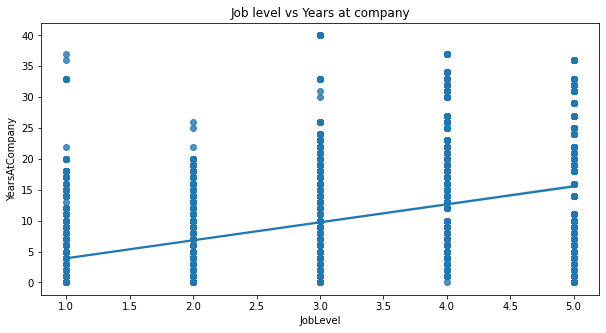

In [117]:
plt.figure(figsize=(10,5))
sns.regplot(data=HR_data,x='JobLevel',y='YearsAtCompany')
plt.title("Job level vs Years at company")
plt.show()

In [118]:
HR_data.groupby(['JobLevel'])['YearsAtCompany'].mean().to_frame()

,YearsAtCompany
JobLevel,
1.0,4.006600
2.0,6.744778
3.0,9.287813
4.0,13.778302
5.0,15.101555


# Inference
The employees who are working in the company for more years are at job level 5. 

# Total working years vs Monthly income

Text(0.5, 1.0, 'Total working years vs Monthly income')

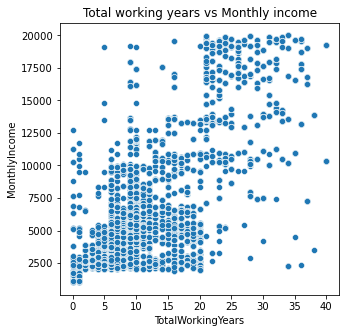

In [119]:
sns.scatterplot(data=HR_data,x='TotalWorkingYears',y='MonthlyIncome')
plt.title("Total working years vs Monthly income") 

# Inference
The employees who are working for more years have higher salary.

Text(0.5, 1.0, 'Job level vs Years since last promotion')

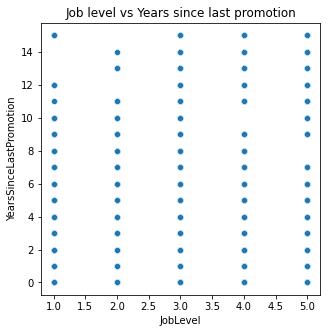

In [120]:
sns.scatterplot(data=HR_data,x='JobLevel',y='YearsSinceLastPromotion')
plt.title("Job level vs Years since last promotion") 

In [121]:
HR_data.groupby(['JobLevel'])['YearsSinceLastPromotion'].mean().to_frame()

,YearsSinceLastPromotion
JobLevel,
1.0,1.212111
2.0,1.879723
3.0,3.307227
4.0,4.792920
5.0,4.588289


# Inference
The employees who are in job level 4 & 5 have higher number of promotion since last year.

Text(0.5, 1.0, 'Years since last promotion vs Monthly income')

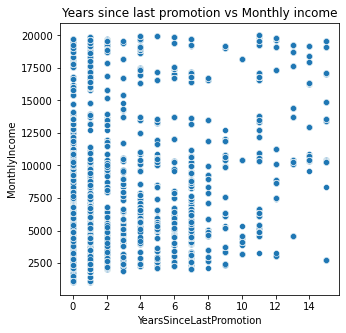

In [122]:
sns.scatterplot(data=HR_data,x='YearsSinceLastPromotion',y='MonthlyIncome')
plt.title("Years since last promotion vs Monthly income") 

In [123]:
HR_data.groupby(['YearsSinceLastPromotion'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
YearsSinceLastPromotion,
0.0,5532.101673
1.0,5984.224001
2.0,5890.785545
3.0,6822.169632
4.0,9629.603754
5.0,7217.628331
6.0,8406.468504
7.0,7028.004115
8.0,7958.491166


# Inference
The employees getting more promotion have high salary.

# Multivariate Visualization

# Gender & Monthly income vs Attrition

<AxesSubplot:xlabel='Gender', ylabel='MonthlyIncome'>

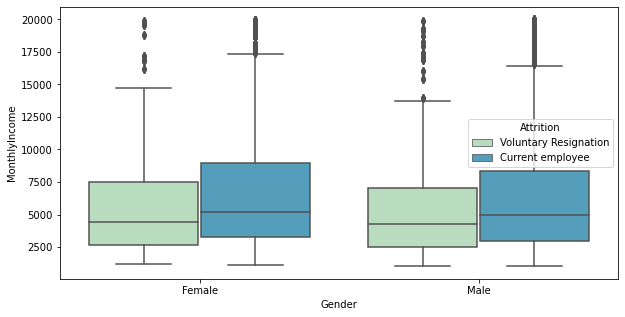

In [124]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender", y="MonthlyIncome", data=HR_data,hue='Attrition',palette='GnBu')

In [125]:
HR_data.groupby(['Gender','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
Gender Attrition                           
Female Current employee              5204.0
       Voluntary Resignation         4448.0
Male   Current employee              4941.0
       Voluntary Resignation         4284.0

In [126]:
HR_data.groupby(['Gender','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
Gender Attrition                           
Female Current employee         6863.720631
       Voluntary Resignation    5716.209464
Male   Current employee         6529.131901
       Voluntary Resignation    5641.251653

# Inference
Monthly income rate of male and female for attrition is almost same .

# Gender & Age vs Attrition

<AxesSubplot:xlabel='Gender', ylabel='Age'>

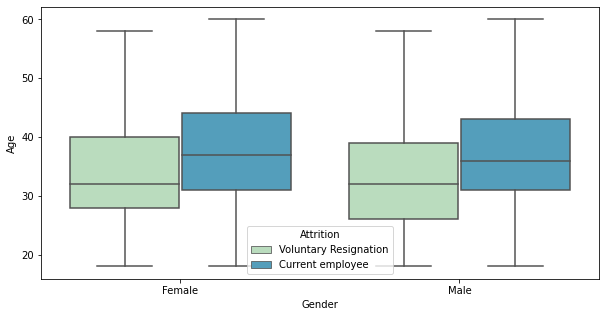

In [127]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Gender", y="Age", data=HR_data,hue='Attrition',palette='GnBu')

In [128]:
HR_data.groupby(['Gender','Attrition'])['Age'].mean().to_frame()

Age
Gender Attrition                       
Female Current employee       37.948644
       Voluntary Resignation  33.785814
Male   Current employee       37.279759
       Voluntary Resignation  33.607489

In [129]:
HR_data.groupby(['Gender','Attrition'])['Age'].median().to_frame()

Age
Gender Attrition                  
Female Current employee       37.0
       Voluntary Resignation  32.0
Male   Current employee       36.0
       Voluntary Resignation  32.0

# Inference
The attrition age for both the genders are equal.

From these we can conclude that gender does not have much effect in employee attrition.

# Department & Distance from home vs Attrition

<AxesSubplot:xlabel='Department', ylabel='DistanceFromHome'>

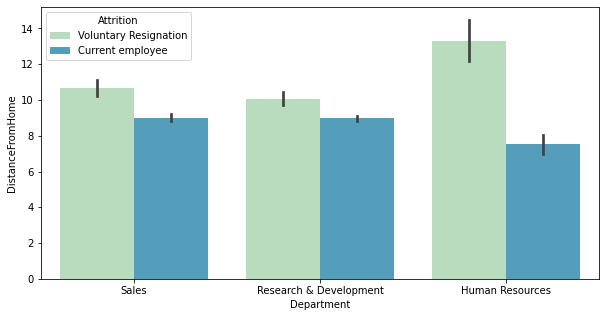

In [130]:
plt.figure(figsize=(10,5))
sns.barplot( x="Department", y='DistanceFromHome',data=HR_data,hue='Attrition',palette='GnBu')

In [131]:
HR_data.groupby(['Department','Attrition'])['DistanceFromHome'].mean().to_frame()

DistanceFromHome
Department             Attrition                              
Human Resources        Current employee               7.515188
                       Voluntary Resignation         13.323077
Research & Development Current employee               8.972742
                       Voluntary Resignation         10.079049
Sales                  Current employee               9.007056
                       Voluntary Resignation         10.682101

In [132]:
HR_data.groupby(['Department','Attrition'])['DistanceFromHome'].median().to_frame()

DistanceFromHome
Department             Attrition                              
Human Resources        Current employee                    5.0
                       Voluntary Resignation              13.0
Research & Development Current employee                    7.0
                       Voluntary Resignation               8.0
Sales                  Current employee                    7.0
                       Voluntary Resignation               9.0

# Inference
The employees whoes distance from home is large is leaving the company.

# Age & Monthly income vs Attrition

<Figure size 1152x432 with 0 Axes>

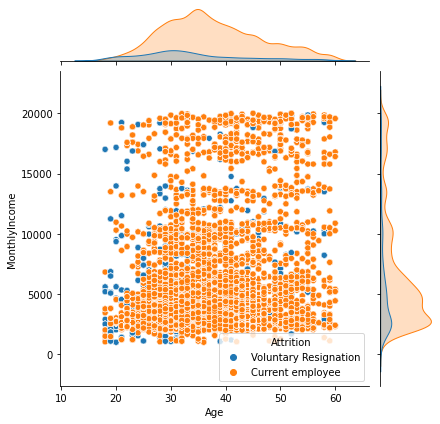

In [133]:
plt.figure(figsize = (16,6))
sns.jointplot(x='Age',y='MonthlyIncome',data=HR_data,hue='Attrition')
plt.show()

In [134]:
HR_data.groupby(['Attrition'])['Age'].mean().to_frame()

,Age
Attrition,
Current employee,37.548295
Voluntary Resignation,33.676645


In [135]:
HR_data.groupby(['Attrition'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
Attrition,
Current employee,6663.573103
Voluntary Resignation,5670.316514


# Inference
Younger age employees with lower salary is leaving the company.

# Business travel & Monthly income vs Attrition

<AxesSubplot:xlabel='BusinessTravel', ylabel='MonthlyIncome'>

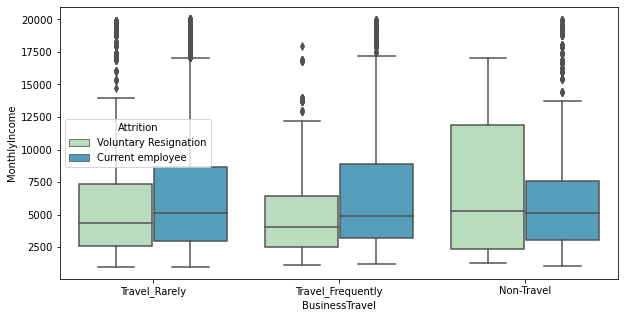

In [136]:
plt.figure(figsize=(10,5))
sns.boxplot(x='BusinessTravel',y='MonthlyIncome',data=HR_data,hue='Attrition',palette='GnBu')

In [137]:
HR_data.groupby(['BusinessTravel','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
BusinessTravel    Attrition                           
Non-Travel        Current employee         6372.973660
                  Voluntary Resignation    7523.141361
Travel_Frequently Current employee         6634.292771
                  Voluntary Resignation    5062.560147
Travel_Rarely     Current employee         6715.806377
                  Voluntary Resignation    5799.047855

In [138]:
HR_data.groupby(['BusinessTravel','Attrition'])['MonthlyIncome'].median().to_frame()

MonthlyIncome
BusinessTravel    Attrition                           
Non-Travel        Current employee              5093.0
                  Voluntary Resignation         5304.0
Travel_Frequently Current employee              4898.0
                  Voluntary Resignation         4084.0
Travel_Rarely     Current employee              5087.0
                  Voluntary Resignation         4382.0

# Inference
The employees who travel frequently with lower salary have chance of leaving the company.

# Job stisfaction & Monthly income vs Attrition

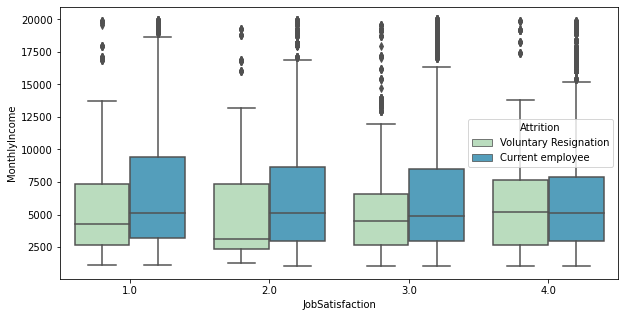

In [139]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='JobSatisfaction',y='MonthlyIncome',data=HR_data,hue='Attrition',palette='GnBu')
plt.show()

In [140]:
HR_data.groupby(['JobSatisfaction','Attrition'])['MonthlyIncome'].mean().to_frame()

MonthlyIncome
JobSatisfaction Attrition                           
1.0             Current employee         6829.714747
                Voluntary Resignation    5528.544118
2.0             Current employee         6781.204678
                Voluntary Resignation    5259.923410
3.0             Current employee         6618.245516
                Voluntary Resignation    5733.739539
4.0             Current employee         6538.307461
                Voluntary Resignation    6027.187043

# Inference
The employees with low job satisfaction & low payment have chance of leaving the company.

# Years since last promotion & Monthly income vs Job level

<Figure size 1152x432 with 0 Axes>

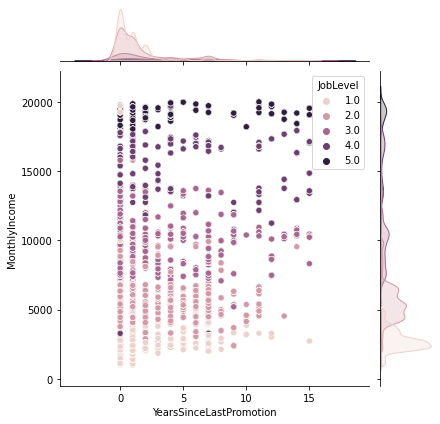

In [141]:
plt.figure(figsize = (16,6))
sns.jointplot(x='YearsSinceLastPromotion',y='MonthlyIncome',data=HR_data,hue='JobLevel')
plt.show()

In [142]:
HR_data.groupby(['JobLevel'])['MonthlyIncome'].mean().to_frame()

,MonthlyIncome
JobLevel,
1.0,2817.804423
2.0,5506.260620
3.0,9811.337846
4.0,15459.941627
5.0,19051.022894


In [143]:
HR_data.groupby(['JobLevel'])['YearsSinceLastPromotion'].mean().to_frame()

,YearsSinceLastPromotion
JobLevel,
1.0,1.212111
2.0,1.879723
3.0,3.307227
4.0,4.792920
5.0,4.588289


# Inference
The employees with high job level & higher number of promotions have greater salary.

# Education field & Performance rating vs Attrition

<AxesSubplot:xlabel='EducationField', ylabel='PerformanceRating'>

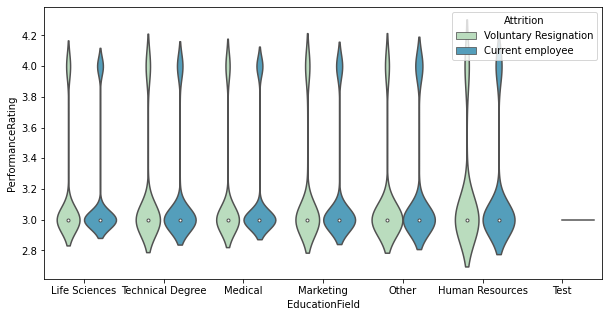

In [144]:
plt.figure(figsize=(10,5))
sns.violinplot( x="EducationField", y='PerformanceRating',data=HR_data,hue='Attrition',palette='GnBu')

In [145]:
HR_data.groupby(['EducationField','Attrition'])['PerformanceRating'].mean().to_frame()

PerformanceRating
EducationField   Attrition                               
Human Resources  Current employee                3.157609
                 Voluntary Resignation           3.153846
Life Sciences    Current employee                3.152985
                 Voluntary Resignation           3.147612
Marketing        Current employee                3.158896
                 Voluntary Resignation           3.154545
Medical          Current employee                3.156863
                 Voluntary Resignation           3.154955
Other            Current employee                3.182239
                 Voluntary Resignation           3.113537
Technical Degree Current employee                3.147004
                 Voluntary Resignation           3.152688
Test             Current employee                3.000000

In [146]:
HR_data.groupby(['EducationField','Attrition'])['PerformanceRating'].median().to_frame()

PerformanceRating
EducationField   Attrition                               
Human Resources  Current employee                     3.0
                 Voluntary Resignation                3.0
Life Sciences    Current employee                     3.0
                 Voluntary Resignation                3.0
Marketing        Current employee                     3.0
                 Voluntary Resignation                3.0
Medical          Current employee                     3.0
                 Voluntary Resignation                3.0
Other            Current employee                     3.0
                 Voluntary Resignation                3.0
Technical Degree Current employee                     3.0
                 Voluntary Resignation                3.0
Test             Current employee                     3.0

# Inference 
The performance rating for the currently working & resigned employees in each education field is almost same.

# Data Pre-Processing

The first step of preprocessing is checking for null value and filling it.We have checked it & a total of 1.5% of null values are present in our dataset.Now for filling the null values we need to check, if there is any outliers present in numerical columns.If there is outlier we need to fill the missing values by using median if not fill it with mean.For the categorical columns we use mode to fill missing values.

We have previously checked for the outliers and the columns:'Monthly income', 'NumCompaniesWorked','PerformanceRating','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear''YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' are having outliers, so filling vaues in these features using median.

In [147]:
for i in ['MonthlyIncome','NumCompaniesWorked','PerformanceRating','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']:
    HR_data[i]=HR_data[i].fillna(HR_data[i].median())

The other numerical columns which doesnot contain outliers are:'Age','DailyRate', 'DistanceFromHome','Education' 'EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyRate','PercentSalaryHike','RelationshipSatisfaction','StandardHours','WorkLifeBalance' can be filled using mean.

In [148]:
for i in ['Age','DailyRate','Education','JobLevel','MonthlyRate','WorkLifeBalance','RelationshipSatisfaction','DistanceFromHome','EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobSatisfaction','PercentSalaryHike','StandardHours']:
 HR_data[i]=HR_data[i].fillna(HR_data[i].mean()) 

The categorical columns:'Attrition', 'BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole','MaritalStatus', 'Over18', 'OverTime', 'Employee Source' can filled by mode.

In [149]:
for i in ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime','Employee Source','Attrition']:
 HR_data[i]=HR_data[i].fillna(HR_data[i].mode()[0])

In [150]:
HR_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

Hence all the null values are filled.

Next we are droping two columns:'EmployeeCount' & 'StandardHours'.Because it doesnot have any influence.

In [151]:
HR_data=HR_data.drop(['EmployeeCount'],axis=1)

In [152]:
HR_data=HR_data.drop(['StandardHours'],axis=1)

In [153]:
HR_data.drop(['BusinessTravel','DailyRate','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

In [154]:
HR_data.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [155]:
HR_data.shape

(23436, 25)

Now we can handle outliers.

In [156]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [157]:
lr,ur=remove_outlier(HR_data["MonthlyIncome"])
HR_data["MonthlyIncome"]=np.where(HR_data["MonthlyIncome"]>ur,ur,HR_data["MonthlyIncome"])
HR_data["MonthlyIncome"]=np.where(HR_data["MonthlyIncome"]<lr,lr,HR_data["MonthlyIncome"])

lr,ur=remove_outlier(HR_data["NumCompaniesWorked"])
HR_data["NumCompaniesWorked"]=np.where(HR_data["NumCompaniesWorked"]>ur,ur,HR_data["NumCompaniesWorked"])
HR_data["NumCompaniesWorked"]=np.where(HR_data["NumCompaniesWorked"]<lr,lr,HR_data["NumCompaniesWorked"])

In [158]:
lr,ur=remove_outlier(HR_data["PerformanceRating"])
HR_data["PerformanceRating"]=np.where(HR_data["PerformanceRating"]>ur,ur,HR_data["PerformanceRating"])
HR_data["PerformanceRating"]=np.where(HR_data["PerformanceRating"]<lr,lr,HR_data["PerformanceRating"])

lr,ur=remove_outlier(HR_data["StockOptionLevel"])
HR_data["StockOptionLevel"]=np.where(HR_data["StockOptionLevel"]>ur,ur,HR_data["StockOptionLevel"])
HR_data["StockOptionLevel"]=np.where(HR_data["StockOptionLevel"]<lr,lr,HR_data["StockOptionLevel"])

In [159]:
lr,ur=remove_outlier(HR_data["TotalWorkingYears"])
HR_data["TotalWorkingYears"]=np.where(HR_data["TotalWorkingYears"]>ur,ur,HR_data["TotalWorkingYears"])
HR_data["TotalWorkingYears"]=np.where(HR_data["TotalWorkingYears"]<lr,lr,HR_data["TotalWorkingYears"])

lr,ur=remove_outlier(HR_data["TrainingTimesLastYear"])
HR_data["TrainingTimesLastYear"]=np.where(HR_data["TrainingTimesLastYear"]>ur,ur,HR_data["TrainingTimesLastYear"])
HR_data["TrainingTimesLastYear"]=np.where(HR_data["TrainingTimesLastYear"]<lr,lr,HR_data["TrainingTimesLastYear"])

In [160]:
lr,ur=remove_outlier(HR_data["YearsAtCompany"])
HR_data["YearsAtCompany"]=np.where(HR_data["YearsAtCompany"]>ur,ur,HR_data["YearsAtCompany"])
HR_data["YearsAtCompany"]=np.where(HR_data["YearsAtCompany"]<lr,lr,HR_data["YearsAtCompany"])

In [161]:
lr,ur=remove_outlier(HR_data["YearsInCurrentRole"])
HR_data["YearsInCurrentRole"]=np.where(HR_data["YearsInCurrentRole"]>ur,ur,HR_data["YearsInCurrentRole"])
HR_data["YearsInCurrentRole"]=np.where(HR_data["YearsInCurrentRole"]<lr,lr,HR_data["YearsInCurrentRole"])

In [162]:
lr,ur=remove_outlier(HR_data["YearsSinceLastPromotion"])
HR_data["YearsSinceLastPromotion"]=np.where(HR_data["YearsSinceLastPromotion"]>ur,ur,HR_data["YearsSinceLastPromotion"])
HR_data["YearsSinceLastPromotion"]=np.where(HR_data["YearsSinceLastPromotion"]<lr,lr,HR_data["YearsSinceLastPromotion"])

In [163]:
lr,ur=remove_outlier(HR_data["YearsWithCurrManager"])
HR_data["YearsWithCurrManager"]=np.where(HR_data["YearsWithCurrManager"]>ur,ur,HR_data["YearsWithCurrManager"])
HR_data["YearsWithCurrManager"]=np.where(HR_data["YearsWithCurrManager"]<lr,lr,HR_data["YearsWithCurrManager"])

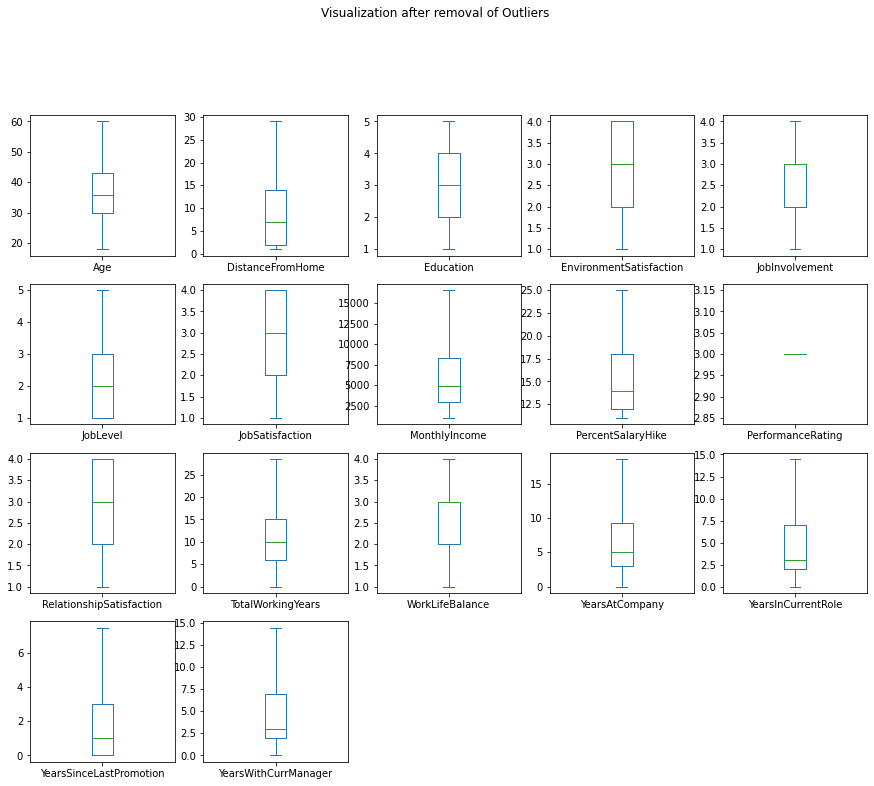

In [164]:
HR_data.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),title='Visualization after removal of Outliers')
plt.show()

Hence all the outliers are removed.

Before feeding our data into a ML model we first need to prepare the data. This includes encoding all the categorical features (either LabelEncoding or the OneHotEncoding) as the model expects the features to be in numerical form. Also for better performance we will do the feature scaling ie bringing all the features onto the same scale by using the StandardScaler provided in the scikit library.

# Encoding

# Label Encoding

We are using label encoder to encode the categorical features.

In [178]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [167]:
def transform(feature):
    le=LabelEncoder()
    HR_data[feature]=le.fit_transform(HR_data[feature])
    print(le.classes_)

In [168]:
cat_cols=HR_data.select_dtypes(include='object')
cat_cols.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Employee Source'],
      dtype='object')

In [169]:
for col in cat_cols.columns:
    transform(col)

['Current employee' 'Voluntary Resignation']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree' 'Test']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']
['Adzuna' 'Company Website' 'GlassDoor' 'Indeed' 'Jora' 'LinkedIn'
 'Recruit.net' 'Referral' 'Seek' 'Test']


In [170]:
HR_data.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,1,2,1.0,2.0,1,2.0,0,3.0,2.0,...,11.0,3.0,1.0,8.0,1.0,6.0,4.0,0.0,5.0,7
1,41.0,1,2,1.0,2.0,1,2.0,0,3.0,2.0,...,11.0,3.0,1.0,8.0,1.0,6.0,4.0,0.0,5.0,7
2,41.0,1,2,1.0,2.0,1,2.0,0,3.0,2.0,...,11.0,3.0,1.0,8.0,1.0,6.0,4.0,0.0,5.0,7
3,41.0,1,2,1.0,2.0,1,2.0,0,3.0,2.0,...,11.0,3.0,1.0,8.0,1.0,6.0,4.0,0.0,5.0,7
4,41.0,1,2,1.0,2.0,1,2.0,0,3.0,2.0,...,11.0,3.0,1.0,8.0,1.0,6.0,4.0,0.0,5.0,7


In [171]:
HR_data.tail()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
23431,60.000000,0,1,1.0,4.0,3,3.0,1,1.0,3.0,...,20.0,3.0,3.0,20.0,3.0,18.625,7.0,2.0,13.0,1
23432,60.000000,0,1,1.0,4.0,1,3.0,1,1.0,3.0,...,20.0,3.0,3.0,19.0,4.0,1.000,0.0,0.0,0.0,1
23433,36.936671,1,1,1.0,3.0,1,4.0,1,3.0,2.0,...,15.0,3.0,3.0,4.0,2.0,2.000,1.0,2.0,2.0,0
23434,36.936671,0,1,5.0,3.0,3,3.0,0,2.0,3.0,...,12.0,3.0,4.0,14.0,3.0,11.000,10.0,5.0,8.0,3
23435,36.936671,0,1,8.0,2.0,1,4.0,1,3.0,2.0,...,18.0,3.0,3.0,8.0,3.0,2.000,2.0,2.0,2.0,6


#standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(HR_data)
df=pd.DataFrame(df,columns=HR_data.columns)

df.describe()
 

# Model Creation:

In [173]:
x = HR_data.drop(columns=['Attrition'],axis=1)
y = HR_data['Attrition']

# Balancing the data:

In [174]:
HR_data.Attrition.value_counts()

0    19727
1     3709
Name: Attrition, dtype: int64

# This is an imbalance data

# Handling the Imbalanced data

In [175]:
from collections import Counter

In [176]:

from imblearn.over_sampling import SMOTE

smote_object = SMOTE()
print('Imbalance data:',Counter(y))
x_smote , y_smote = smote_object.fit_resample(x,y)
print('balance data:',Counter(y_smote))

Imbalance data: Counter({0: 19727, 1: 3709})
balance data: Counter({1: 19727, 0: 19727})


In [180]:

x_smote

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,2,1.0,2.0,1,2.0,0,3.0,2.0,7,...,11.0,3.0,1.0,8.0,1.0,6.000,4.0,0.0,5.0,7
1,41.0,2,1.0,2.0,1,2.0,0,3.0,2.0,7,...,11.0,3.0,1.0,8.0,1.0,6.000,4.0,0.0,5.0,7
2,41.0,2,1.0,2.0,1,2.0,0,3.0,2.0,7,...,11.0,3.0,1.0,8.0,1.0,6.000,4.0,0.0,5.0,7
3,41.0,2,1.0,2.0,1,2.0,0,3.0,2.0,7,...,11.0,3.0,1.0,8.0,1.0,6.000,4.0,0.0,5.0,7
4,41.0,2,1.0,2.0,1,2.0,0,3.0,2.0,7,...,11.0,3.0,1.0,8.0,1.0,6.000,4.0,0.0,5.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39449,52.0,1,8.0,4.0,3,3.0,1,2.0,5.0,3,...,13.0,3.0,3.0,23.0,4.0,1.000,0.0,0.0,0.0,1
39450,24.0,2,3.0,2.0,1,1.0,1,2.0,5.0,3,...,18.0,3.0,4.0,28.5,4.0,18.625,7.0,7.5,12.0,2
39451,29.0,1,10.0,3.0,1,2.0,0,2.0,4.0,0,...,12.0,3.0,4.0,25.0,3.0,7.000,1.0,0.0,7.0,1
39452,35.0,1,2.0,3.0,1,1.0,0,3.0,1.0,2,...,12.0,3.0,4.0,1.0,3.0,1.000,0.0,0.0,0.0,1


In [181]:
y_smote.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int32

In [182]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(x_smote)
df=pd.DataFrame(df,columns=x_smote.columns)

df.describe()
 

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
count,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,...,3.945400e+04,39454.0,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04,3.945400e+04
mean,-1.098125e-14,9.519261e-16,4.266145e-16,1.546461e-15,-9.719165e-17,3.625780e-15,-1.492875e-15,8.870641e-15,-7.873810e-15,1.640740e-16,...,-1.735093e-17,0.0,-1.141784e-15,3.478236e-15,-2.739519e-15,-7.676261e-15,6.446191e-15,3.663252e-15,9.739833e-15,-2.099220e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,0.0,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.848380e+00,-2.345358e+00,-1.052825e+00,-1.838566e+00,-1.699777e+00,-1.507898e+00,-1.234343e+00,-2.314954e+00,-9.061017e-01,-1.807876e+00,...,-1.119125e+00,0.0,-1.565745e+00,-1.434952e+00,-2.437761e+00,-1.245488e+00,-1.120857e+00,-7.594763e-01,-1.118864e+00,-1.360310e+00
25%,-6.923684e-01,-5.239707e-01,-9.316682e-01,-8.581643e-01,-9.411202e-01,-6.037418e-01,-1.234343e+00,-9.416900e-01,-9.061017e-01,-1.005361e+00,...,-8.466076e-01,0.0,-6.466497e-01,-7.495858e-01,-1.040883e+00,-8.503242e-01,-5.468407e-01,-7.594763e-01,-8.309523e-01,-9.823676e-01
50%,-1.669087e-01,-5.239707e-01,-2.047291e-01,1.222370e-01,-1.824631e-01,3.004147e-01,8.101476e-01,4.315737e-01,1.716195e-02,1.984117e-01,...,-3.015722e-01,0.0,2.724460e-01,-2.012928e-01,3.559945e-01,-2.575780e-01,-2.598326e-01,-3.538687e-01,-2.551288e-01,-2.264836e-01
75%,6.738267e-01,1.297416e+00,6.433665e-01,1.102638e+00,5.761941e-01,1.204571e+00,8.101476e-01,4.315737e-01,9.404256e-01,1.000927e+00,...,7.884986e-01,0.0,1.191542e+00,4.840734e-01,3.559945e-01,5.327503e-01,8.882002e-01,5.173890e-02,8.965183e-01,9.073425e-01
max,2.565481e+00,1.297416e+00,2.339558e+00,2.083040e+00,2.852165e+00,1.204571e+00,8.101476e-01,1.804837e+00,2.786953e+00,1.402184e+00,...,2.696122e+00,0.0,1.191542e+00,2.471636e+00,1.752872e+00,2.434478e+00,3.040762e+00,2.282581e+00,3.055857e+00,2.041169e+00


In [183]:
from sklearn.model_selection import train_test_split



x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)